In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
algorithims = ['KNN', 'NB', 'RF', 'SVM', 'DT']
metric_list = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'RMSE']
train_size = 1500

In [3]:
def calc_metrics(y_test, y_pred):
    return metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)), metrics.recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)), metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)), metrics.roc_auc_score(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [4]:
def train_algorithms_and_calcualte_metrics(filename):
    X_train = pd.read_excel(filename)
    X_train = X_train.drop(['Datetime','Tweet Id', 'Label'], axis=1)
    y_train = pd.read_excel(filename)
    y_train.drop(['Datetime', 'Text', 'Tweet Id'], axis=1, inplace=True)


    dataset_size = X_train.shape[0]


    le = preprocessing.LabelEncoder()
    x_encoded=le.fit_transform(X_train).reshape(-1, 1)

    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(x_encoded[:train_size],y_train[:train_size])
    y_pred = model.predict(x_encoded[dataset_size-train_size:])
    knn = calc_metrics(y_train[dataset_size-train_size:], y_pred)


    gnb = GaussianNB()
    gnb.fit(x_encoded[:train_size],y_train[:train_size])
    y_pred = gnb.predict(x_encoded[dataset_size-train_size:])
    nb = calc_metrics(y_train[dataset_size-train_size:], y_pred)


    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(x_encoded[:train_size],y_train[:train_size])
    y_pred=clf.predict(x_encoded[dataset_size-train_size:])
    rf = calc_metrics(y_train[dataset_size-train_size:], y_pred)
    

    classifier = SVC(kernel='linear', random_state = 0)
    classifier.fit(x_encoded[:train_size],y_train[:train_size])
    y_pred = classifier.predict(x_encoded[dataset_size-train_size:])
    svm = calc_metrics(y_train[dataset_size-train_size:], y_pred)


    dt_clf = DecisionTreeClassifier()
    dt_clf = dt_clf.fit(x_encoded[:train_size],y_train[:train_size])
    y_pred = dt_clf.predict(x_encoded[dataset_size-train_size:])
    dt = calc_metrics(y_train[dataset_size-train_size:], y_pred)


    figure, axis = plt.subplots(3, 2)
    figure.set_size_inches(8, 12)
    figure.tight_layout(pad=3.0)
    figure.suptitle(filename, fontsize=14)


    axis[0,0].plot(algorithims, [knn[4], nb[4], rf[4], svm[4], dt[4]])
    axis[0,0].set_title('AUC', fontsize=10)
    axis[0,1].plot(algorithims, [knn[5], nb[5], rf[5], svm[5], dt[5]])
    axis[0,1].set_title('RMSE', fontsize=10)
    axis[1,0].plot(algorithims, [knn[0], nb[0], rf[0], svm[0], dt[0]])
    axis[1,0].set_title('Accuracy', fontsize=10)
    axis[1,1].plot(algorithims, [knn[1], nb[1], rf[1], svm[1], dt[1]])
    axis[1,1].set_title('Precision', fontsize=10)
    axis[2,0].plot(algorithims, [knn[2], nb[2], rf[2], svm[2], dt[2]])
    axis[2,0].set_title('Recall', fontsize=10)
    axis[2,1].plot(algorithims, [knn[3], nb[3], rf[3], svm[3], dt[3]])
    axis[2,1].set_title('F1', fontsize=10)

    
    plt.show()

    return [knn, nb, rf, svm, dt]

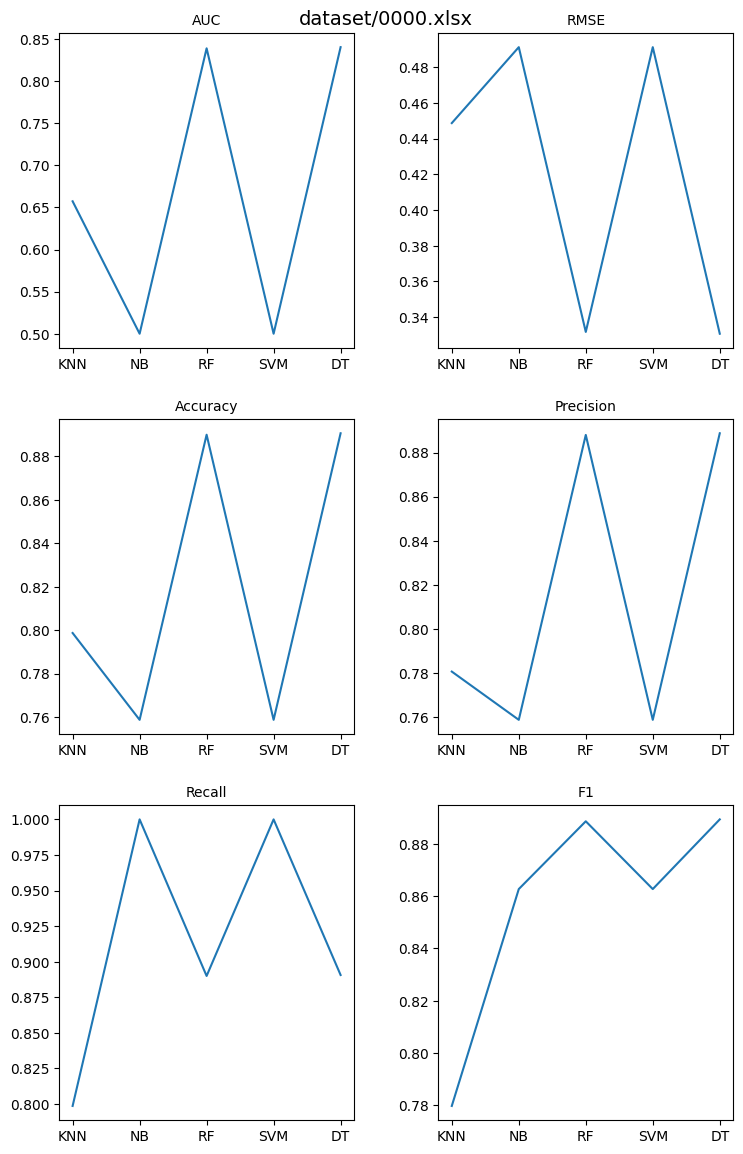

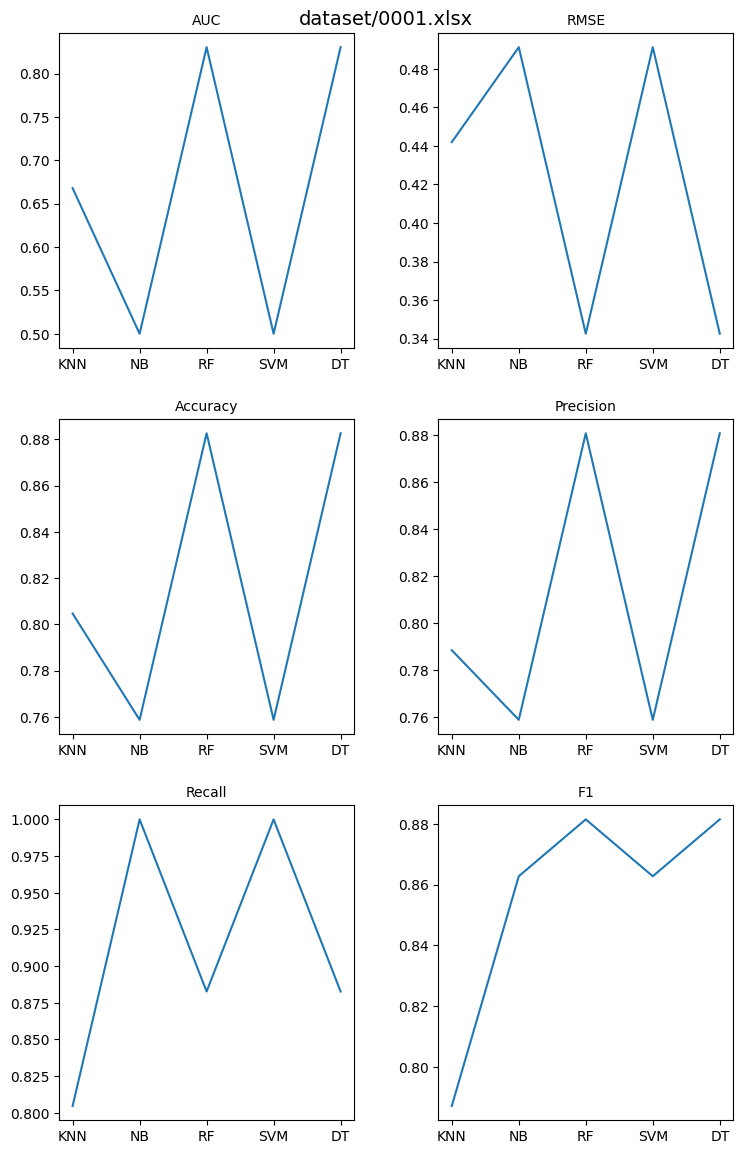

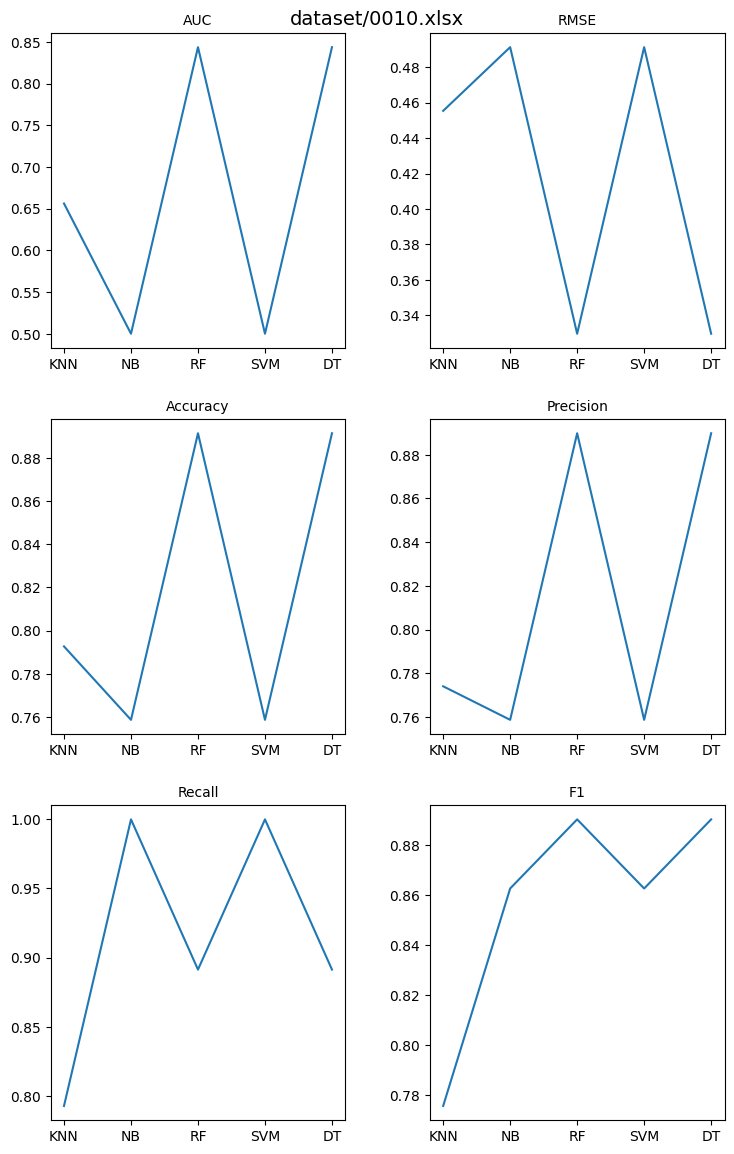

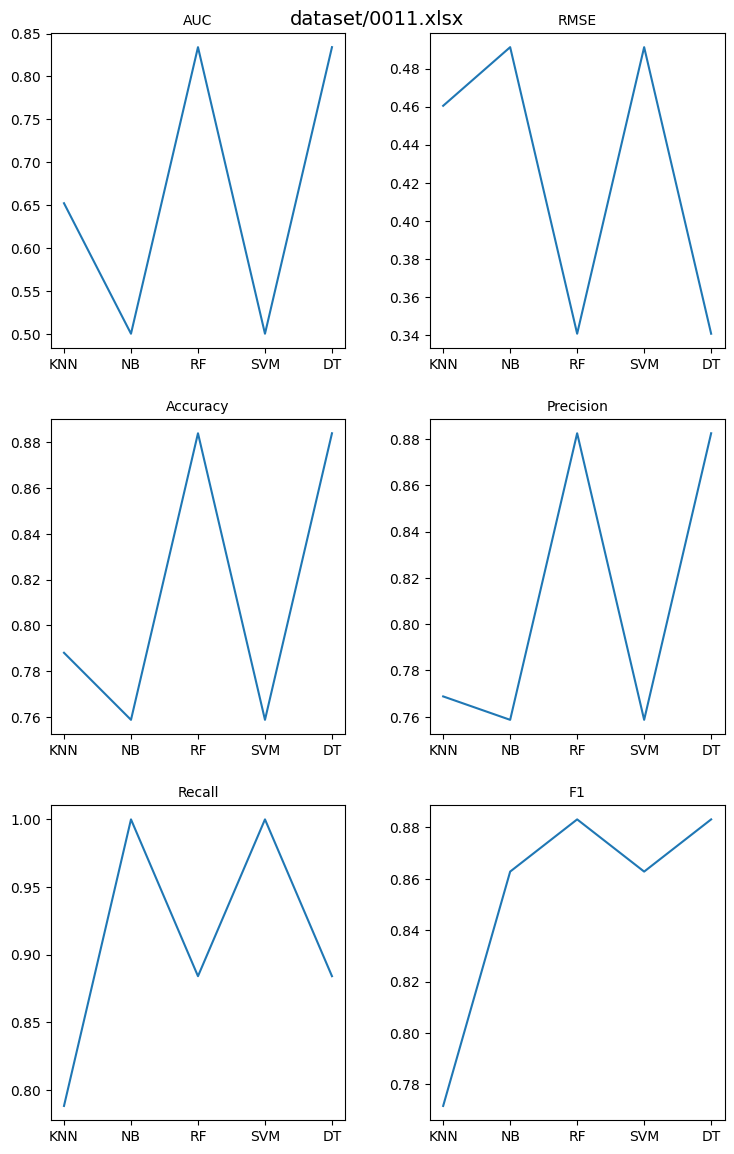

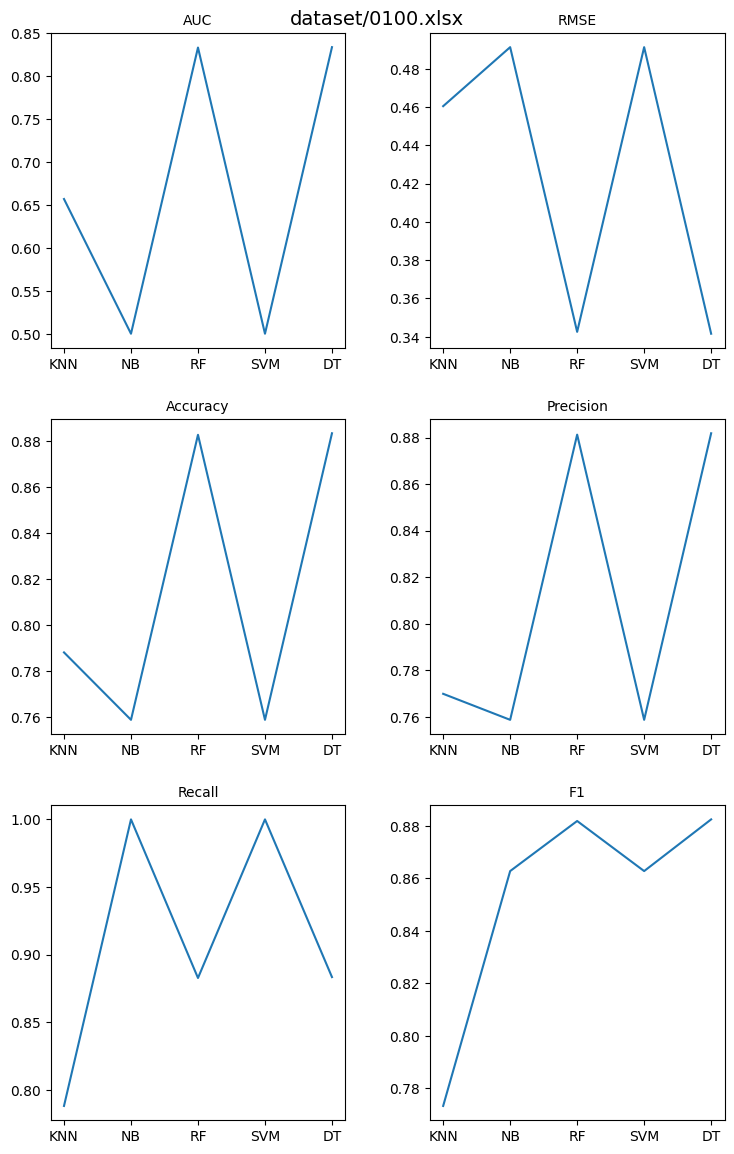

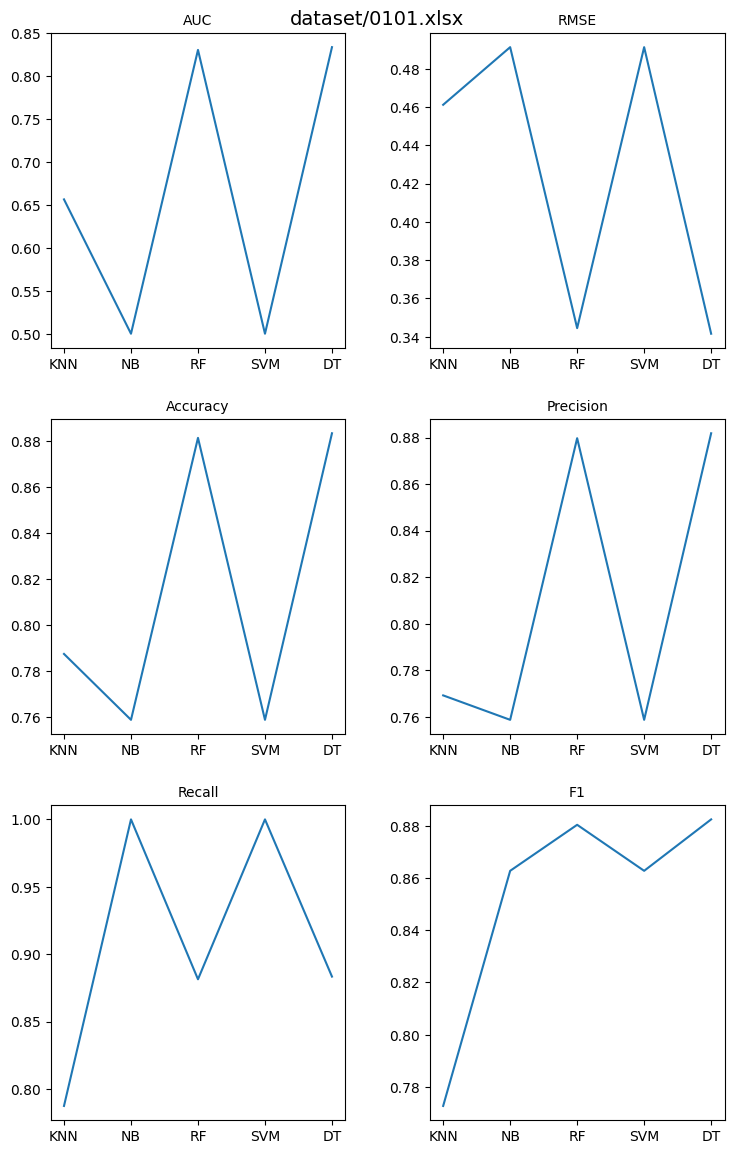

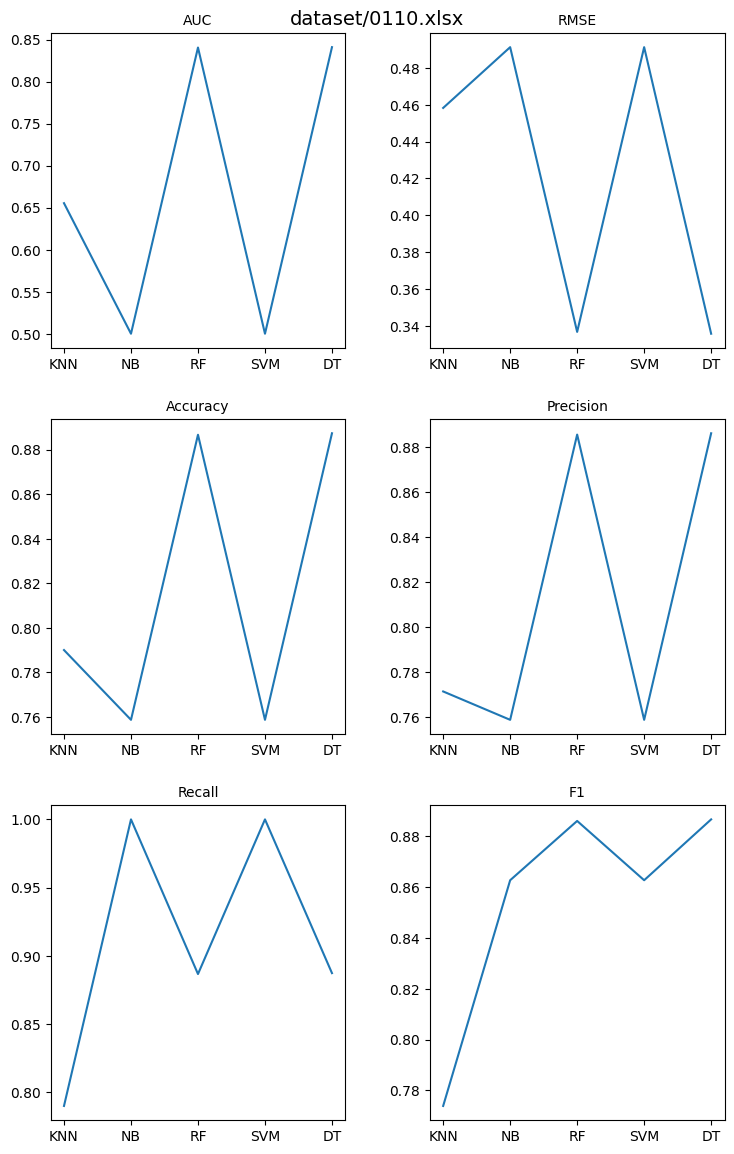

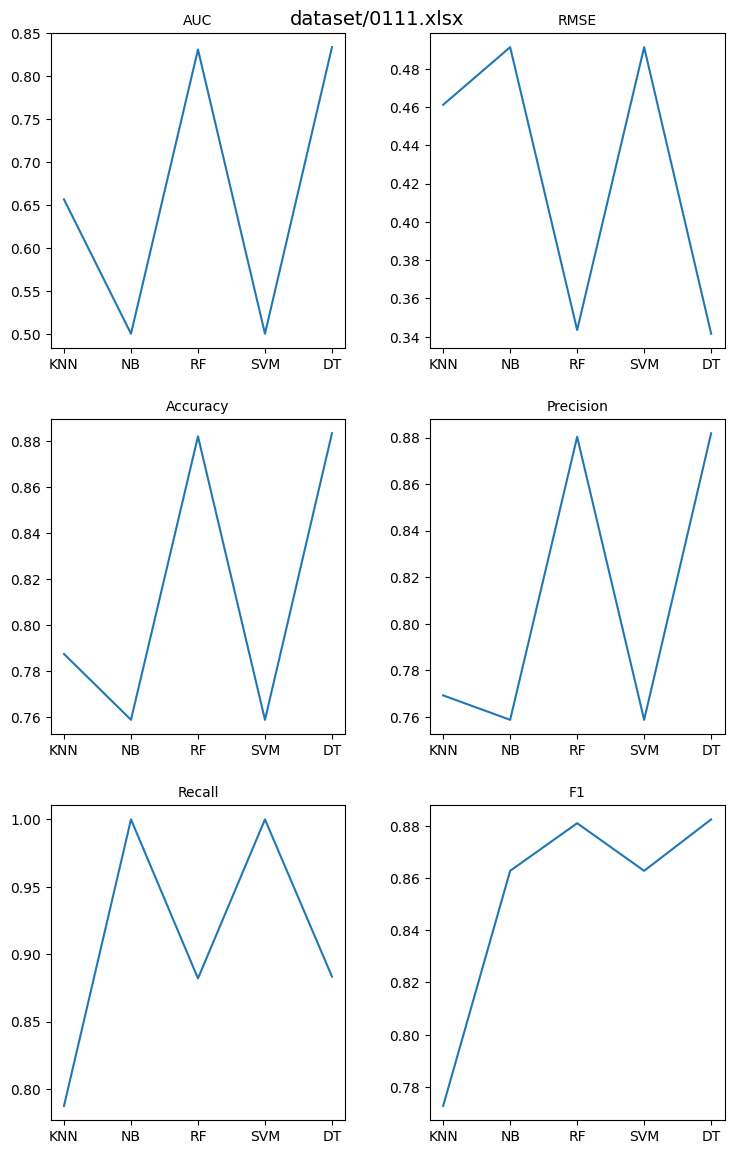

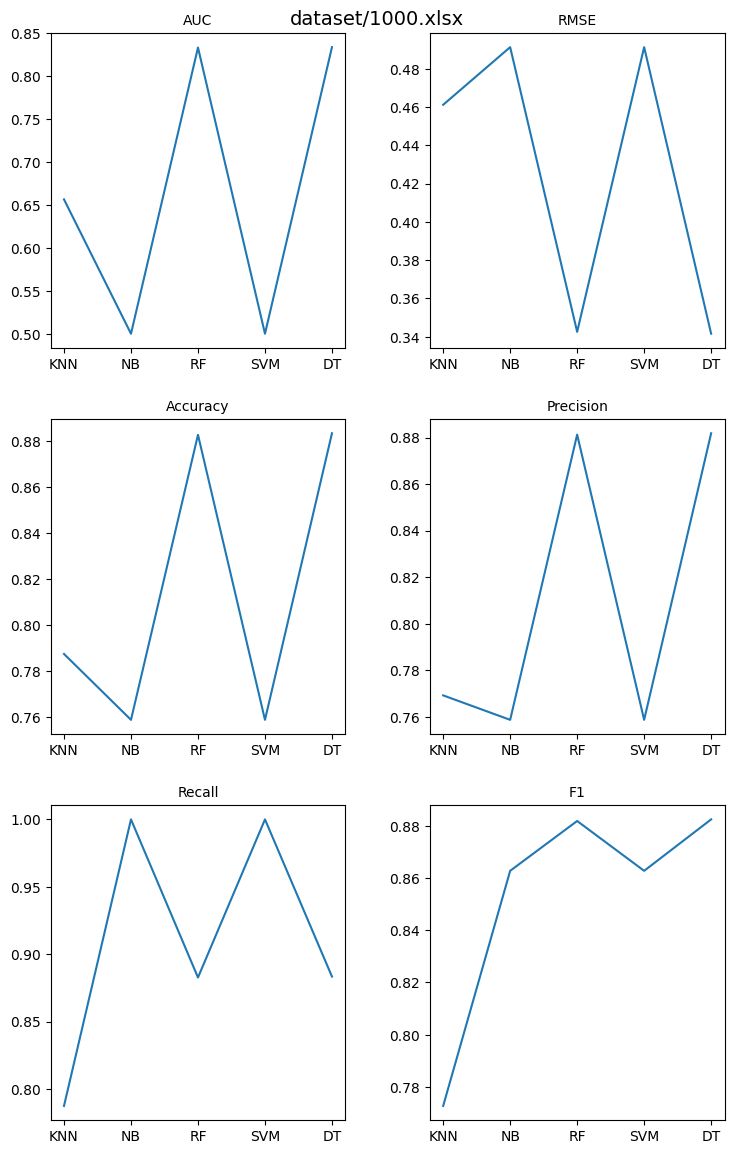

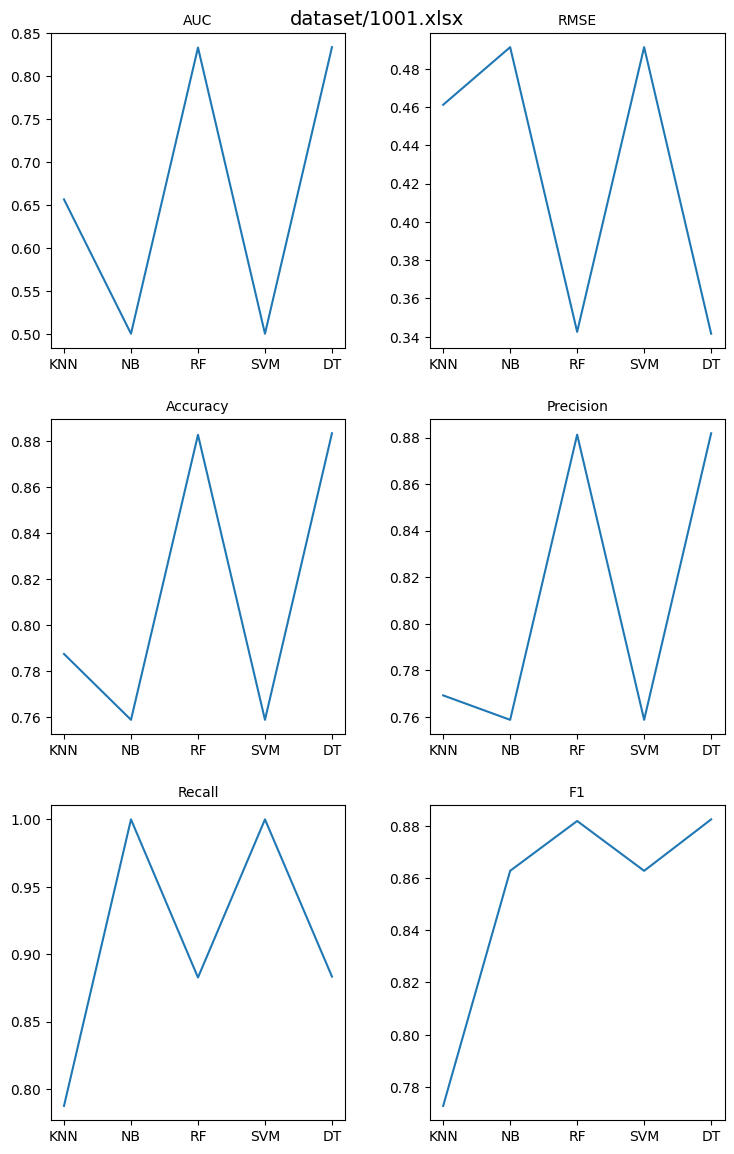

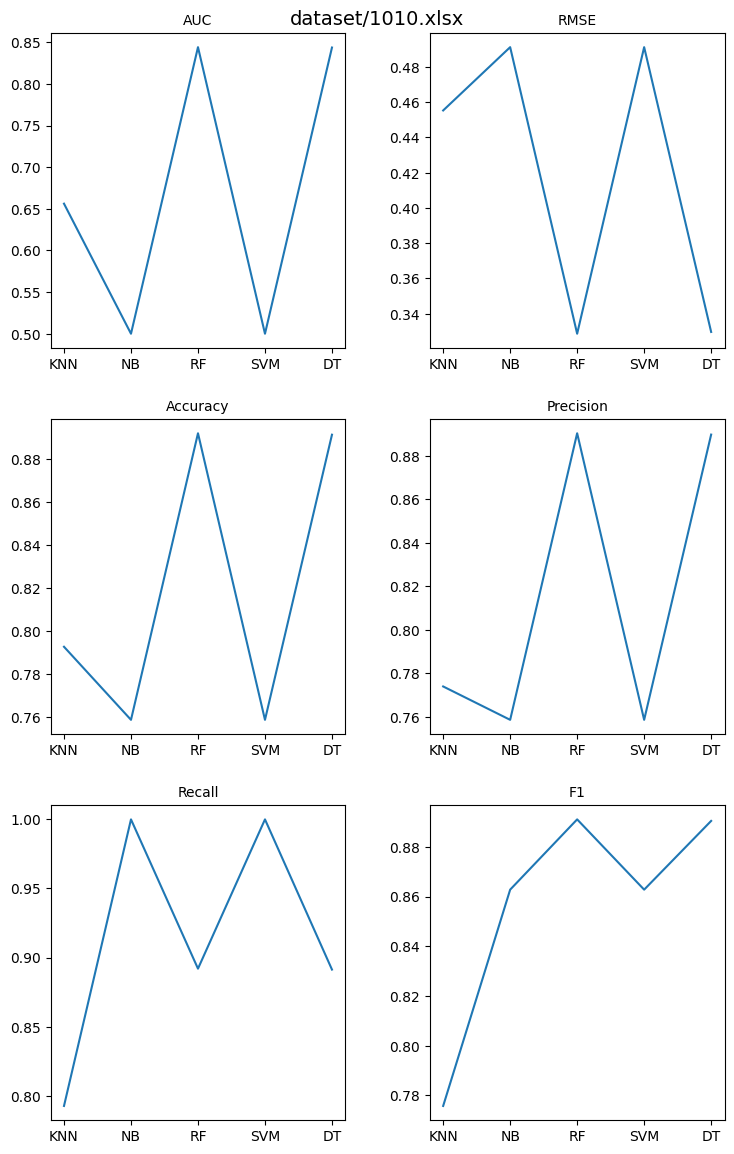

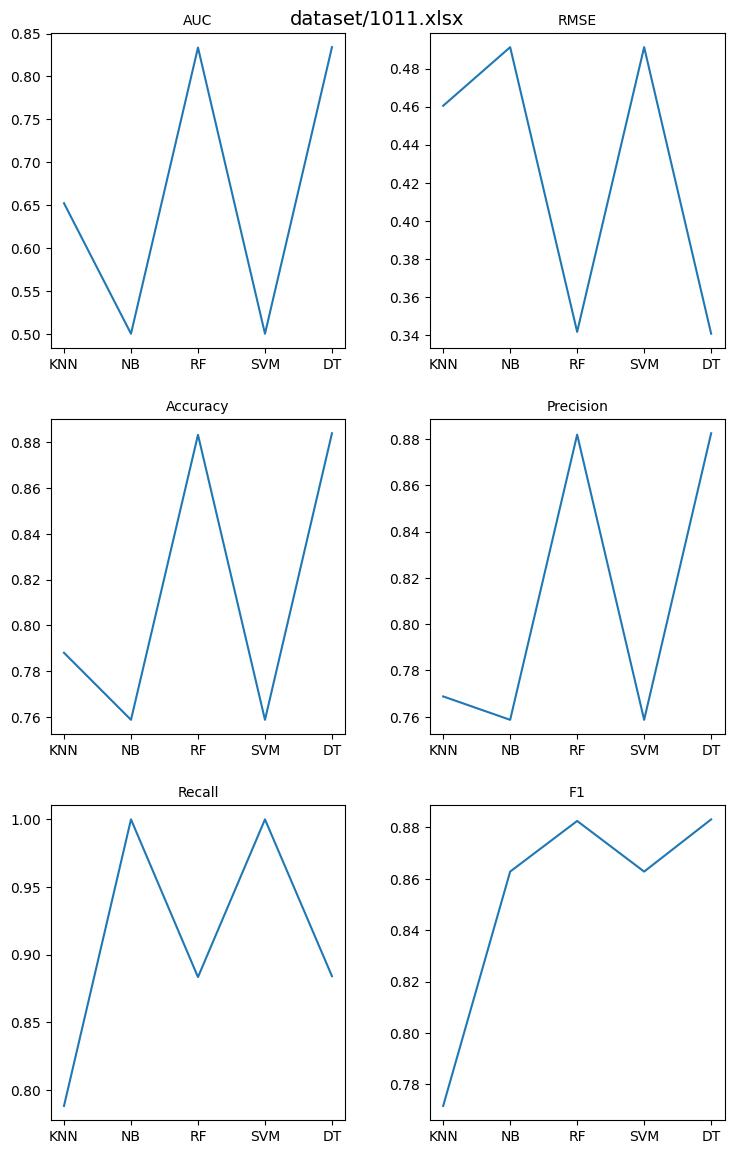

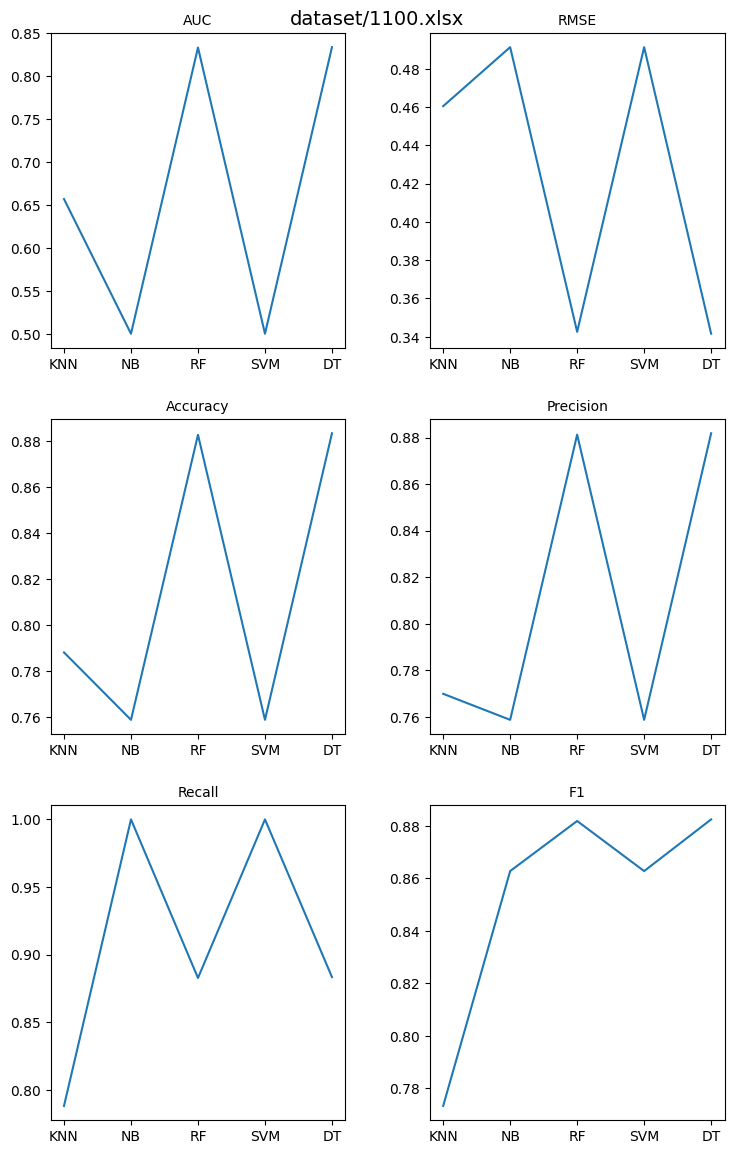

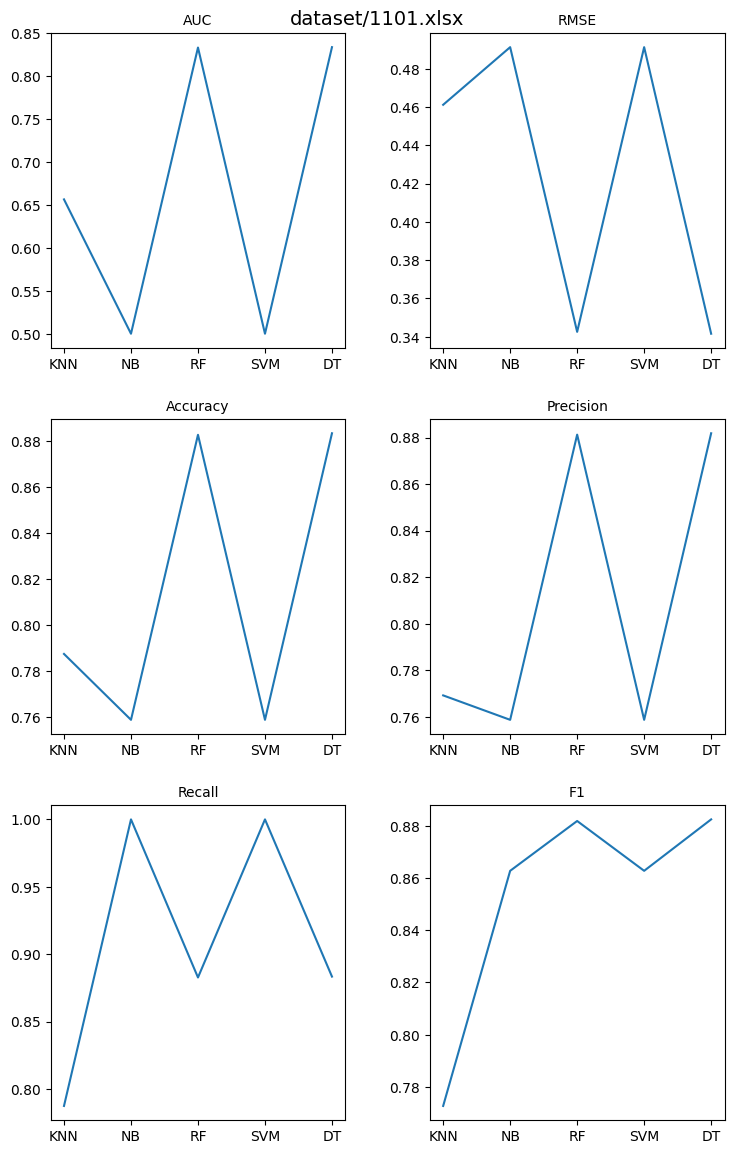

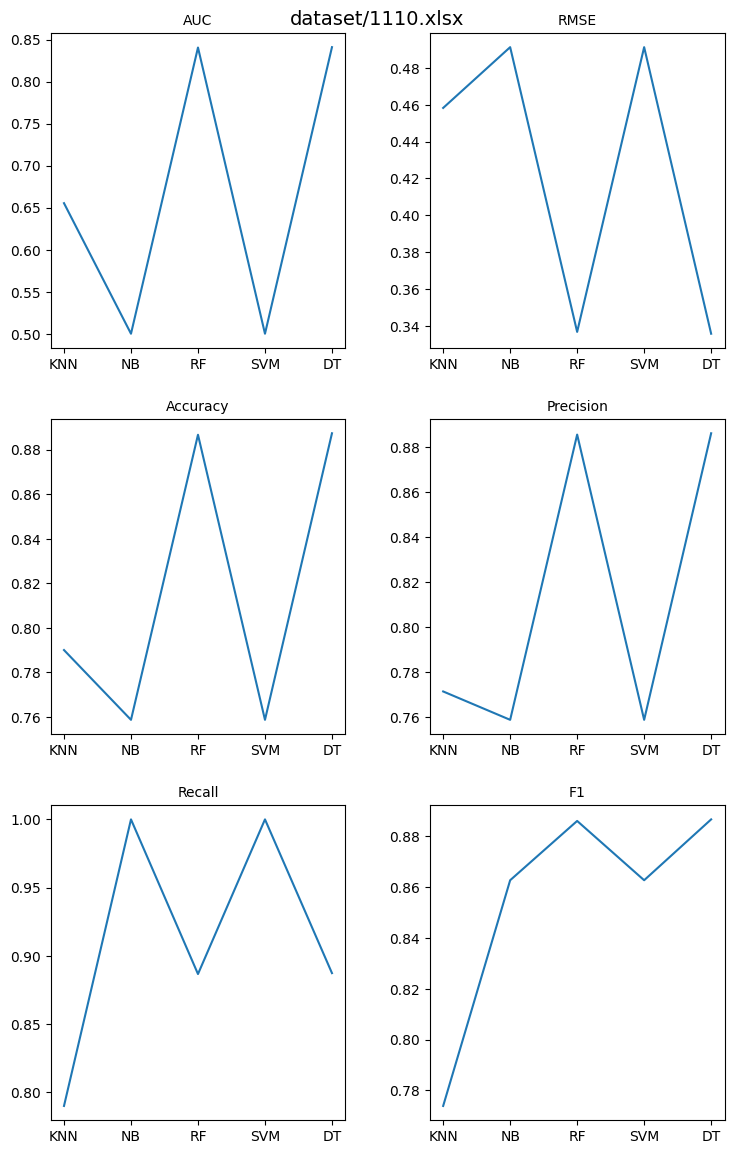

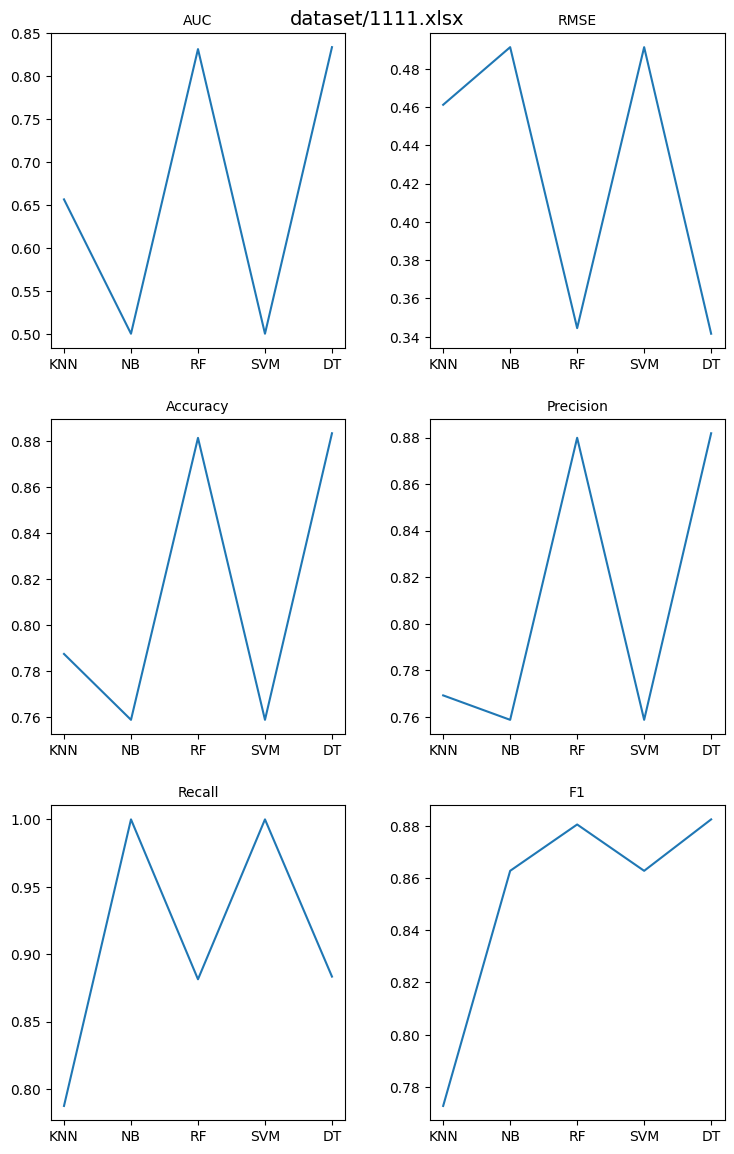

In [5]:
import os

knns = []
nbs = []
rfs = []
svms = []
dts = []
file_codes = []

files = os.listdir('dataset')
for file in files:
    file_codes.append(file.split('.')[0])
    knn, nb, rf, svm, dt = train_algorithms_and_calcualte_metrics(f"dataset/{file}")
    knns.append(knn)
    nbs.append(nb)
    rfs.append(rf)
    svms.append(svm)
    dts.append(dt)


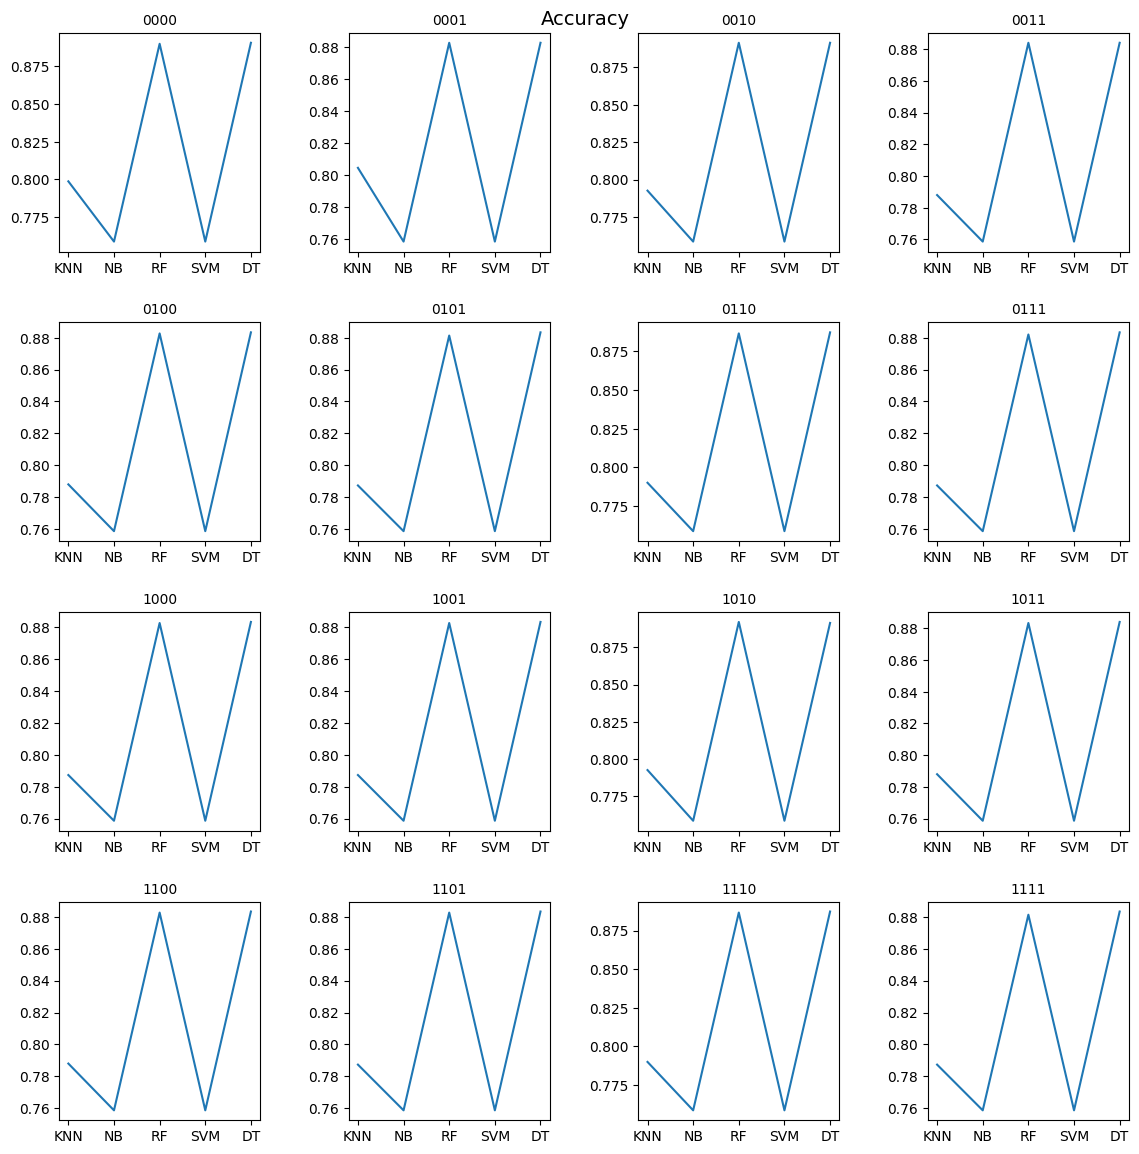

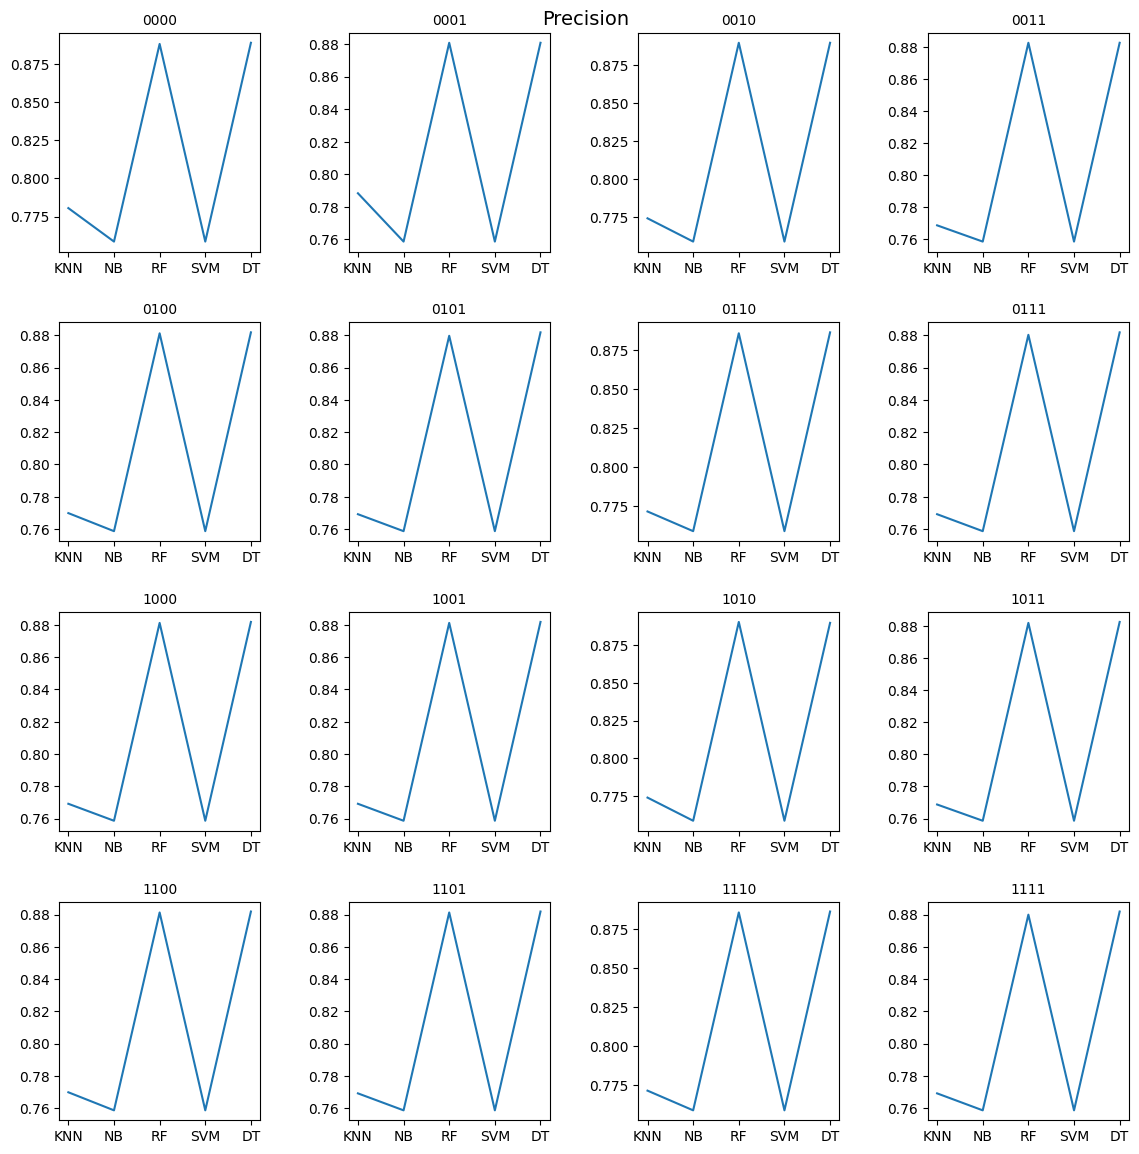

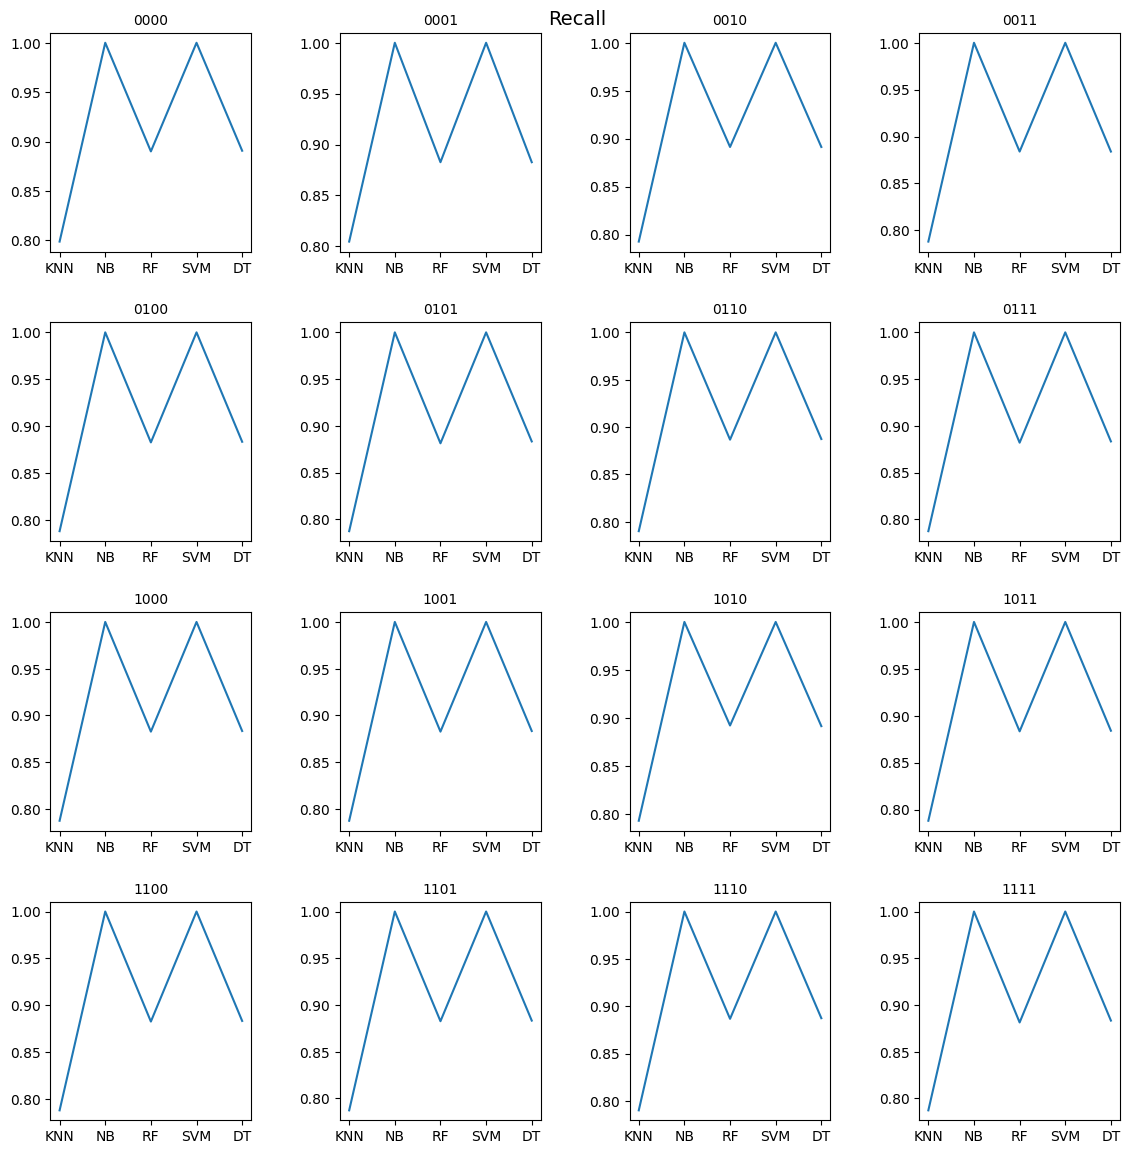

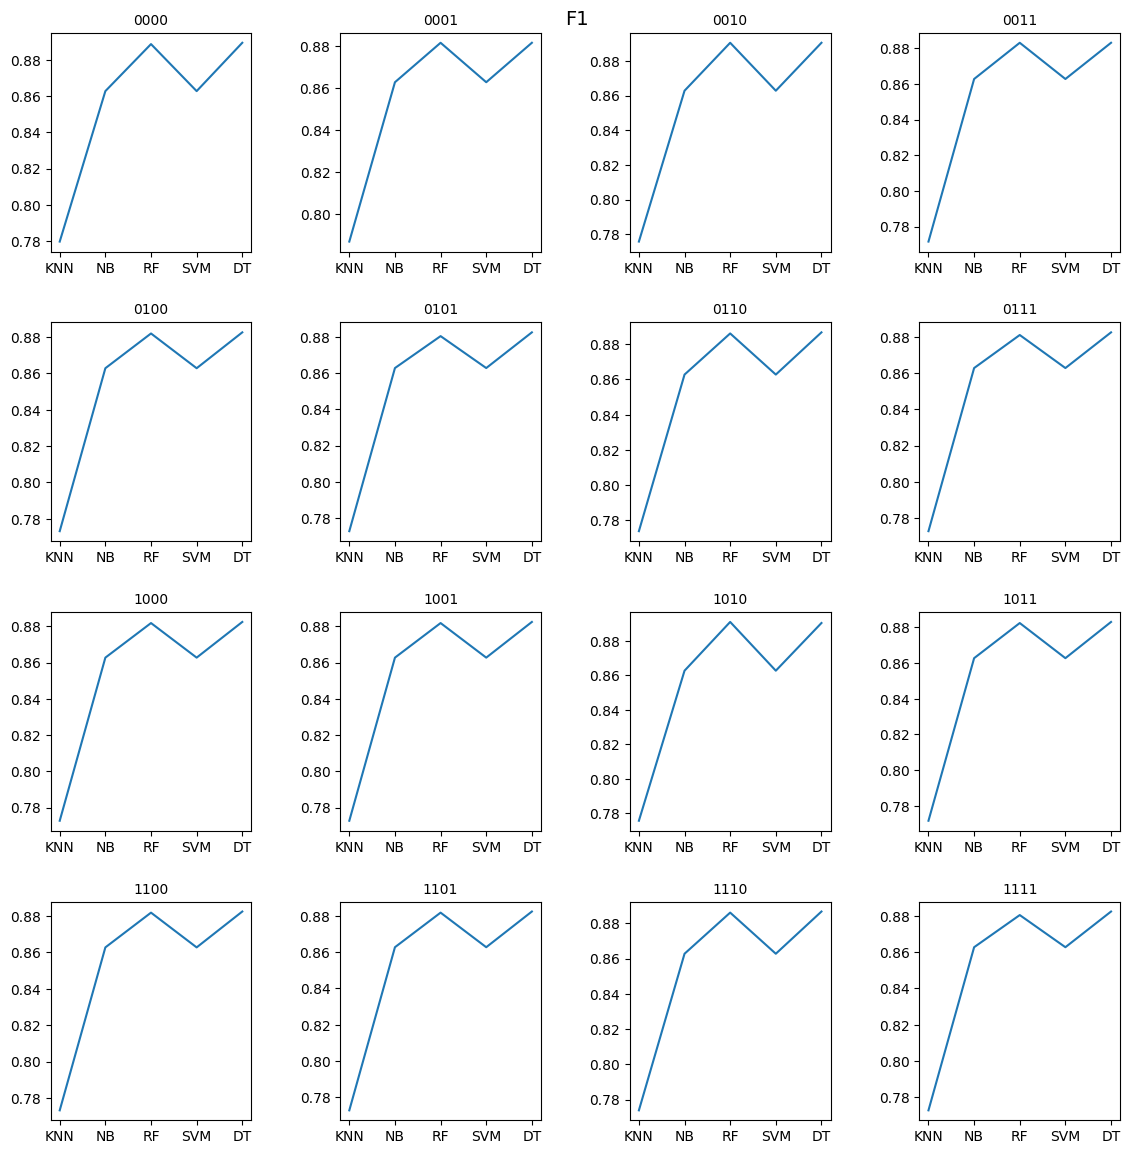

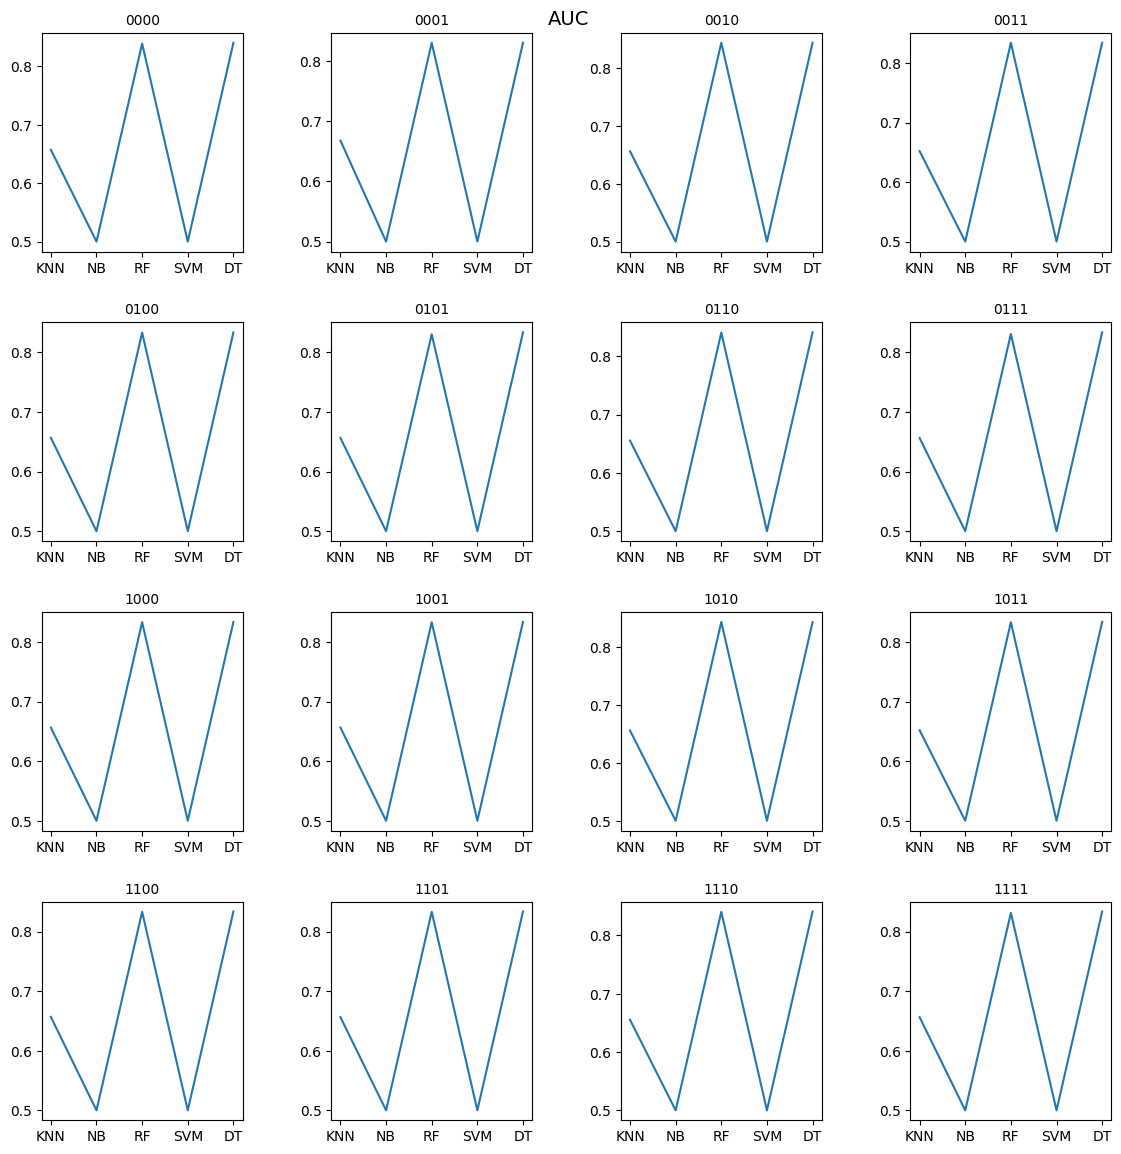

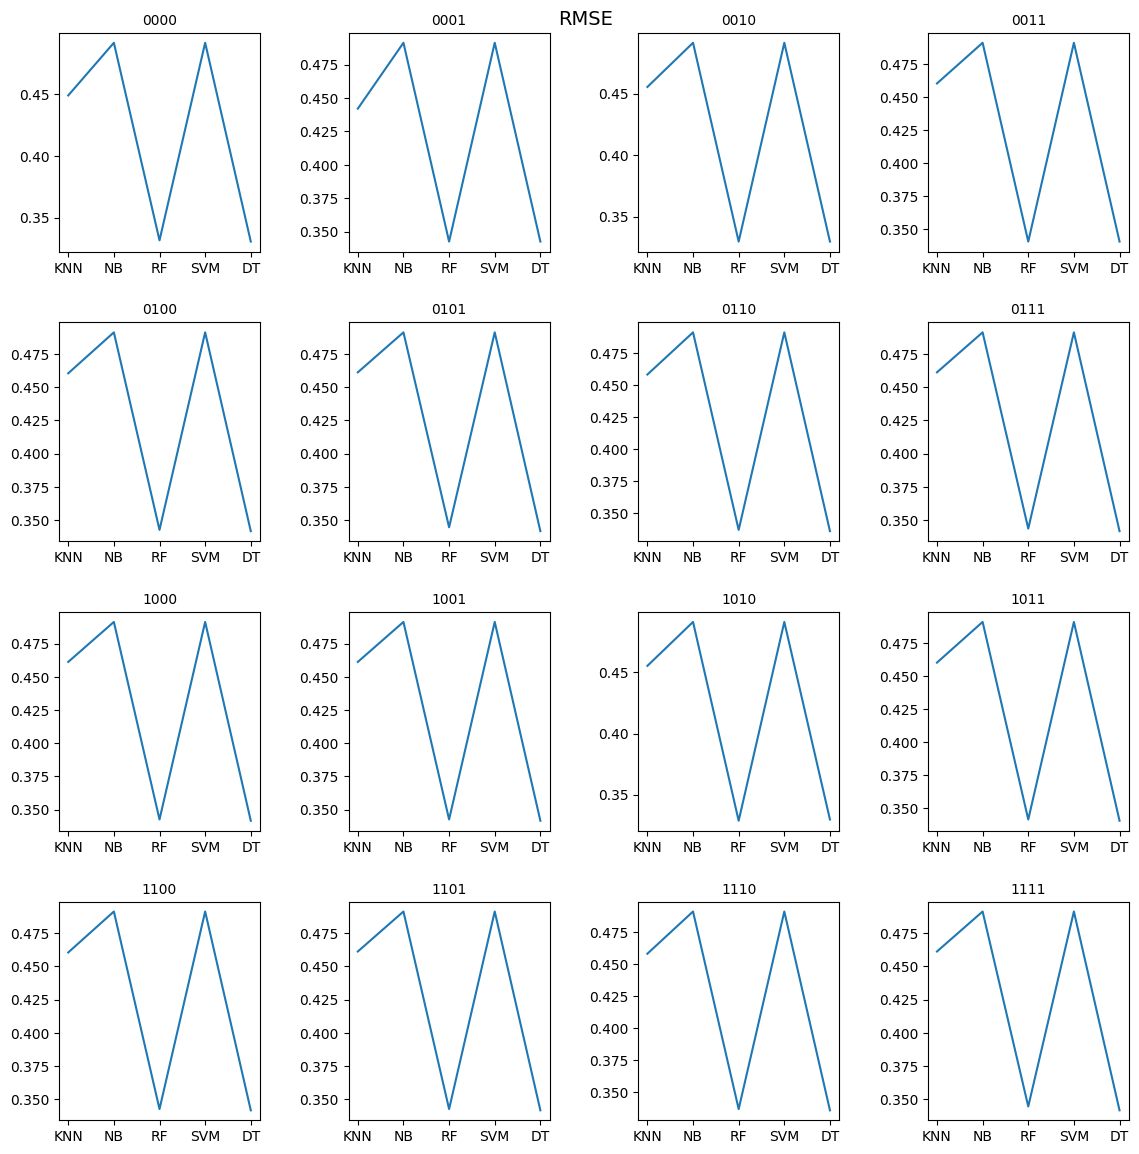

In [6]:
for index,metric in enumerate(metric_list):
    figure, axis = plt.subplots(4, 4)
    figure.set_size_inches(12, 12)
    figure.tight_layout(pad=3.0)
    figure.suptitle(metric, fontsize=14)

    axis[0,0].plot(algorithims, [knns[0][index], nbs[0][index], rfs[0][index], svms[0][index], dts[0][index]])
    axis[0,0].set_title('0000', fontsize=10)
    axis[0,1].plot(algorithims, [knns[1][index], nbs[1][index], rfs[1][index], svms[1][index], dts[1][index]])
    axis[0,1].set_title('0001', fontsize=10)
    axis[0,2].plot(algorithims, [knns[2][index], nbs[2][index], rfs[2][index], svms[2][index], dts[2][index]])
    axis[0,2].set_title('0010', fontsize=10)
    axis[0,3].plot(algorithims, [knns[3][index], nbs[3][index], rfs[3][index], svms[3][index], dts[3][index]])
    axis[0,3].set_title('0011', fontsize=10)
    axis[1,0].plot(algorithims, [knns[4][index], nbs[4][index], rfs[4][index], svms[4][index], dts[4][index]])
    axis[1,0].set_title('0100', fontsize=10)
    axis[1,1].plot(algorithims, [knns[5][index], nbs[5][index], rfs[5][index], svms[5][index], dts[5][index]])
    axis[1,1].set_title('0101', fontsize=10)
    axis[1,2].plot(algorithims, [knns[6][index], nbs[6][index], rfs[6][index], svms[6][index], dts[6][index]])
    axis[1,2].set_title('0110', fontsize=10)
    axis[1,3].plot(algorithims, [knns[7][index], nbs[7][index], rfs[7][index], svms[7][index], dts[7][index]])
    axis[1,3].set_title('0111', fontsize=10)
    axis[2,0].plot(algorithims, [knns[8][index], nbs[8][index], rfs[8][index], svms[8][index], dts[8][index]])
    axis[2,0].set_title('1000', fontsize=10)
    axis[2,1].plot(algorithims, [knns[9][index], nbs[9][index], rfs[9][index], svms[9][index], dts[9][index]])
    axis[2,1].set_title('1001', fontsize=10)
    axis[2,2].plot(algorithims, [knns[10][index], nbs[10][index], rfs[10][index], svms[10][index], dts[10][index]])
    axis[2,2].set_title('1010', fontsize=10)
    axis[2,3].plot(algorithims, [knns[11][index], nbs[11][index], rfs[11][index], svms[11][index], dts[11][index]])
    axis[2,3].set_title('1011', fontsize=10)
    axis[3,0].plot(algorithims, [knns[12][index], nbs[12][index], rfs[12][index], svms[12][index], dts[12][index]])
    axis[3,0].set_title('1100', fontsize=10)
    axis[3,1].plot(algorithims, [knns[13][index], nbs[13][index], rfs[13][index], svms[13][index], dts[13][index]])
    axis[3,1].set_title('1101', fontsize=10)
    axis[3,2].plot(algorithims, [knns[14][index], nbs[14][index], rfs[14][index], svms[14][index], dts[14][index]])
    axis[3,2].set_title('1110', fontsize=10)
    axis[3,3].plot(algorithims, [knns[15][index], nbs[15][index], rfs[15][index], svms[15][index], dts[15][index]])
    axis[3,3].set_title('1111', fontsize=10)

    plt.savefig('graphs/metrics/' + metric + '.png')
    
    plt.show()

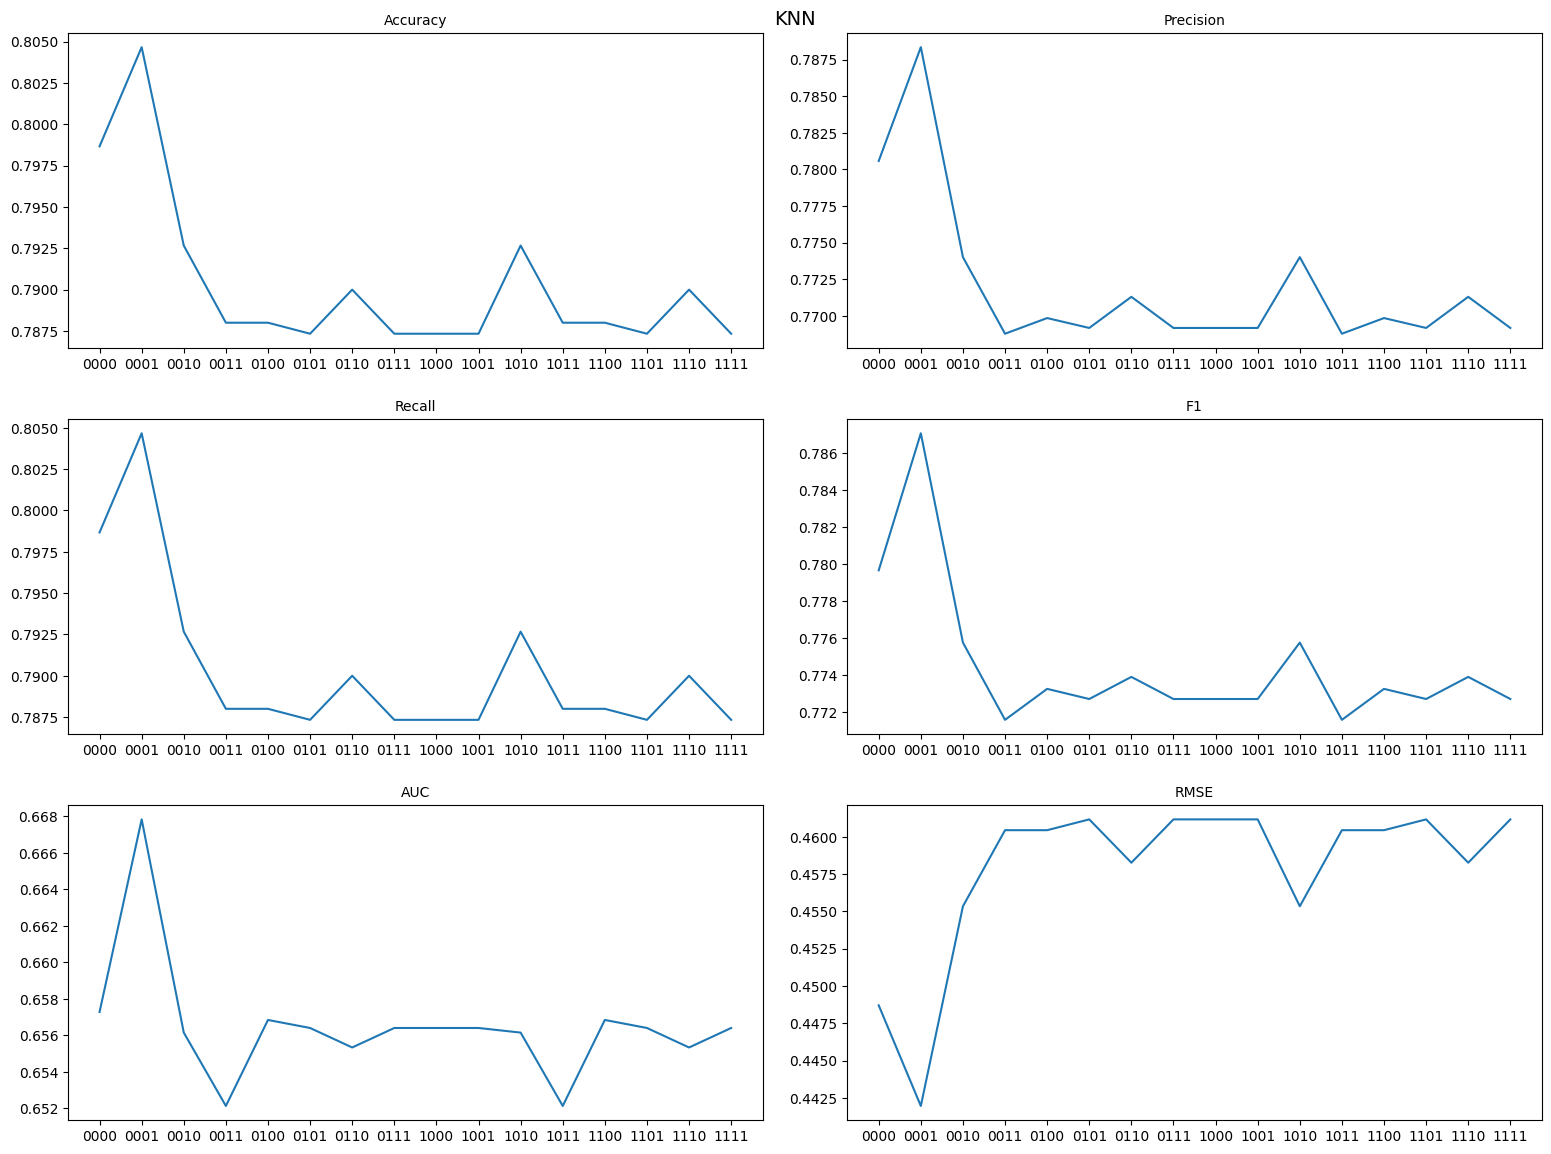

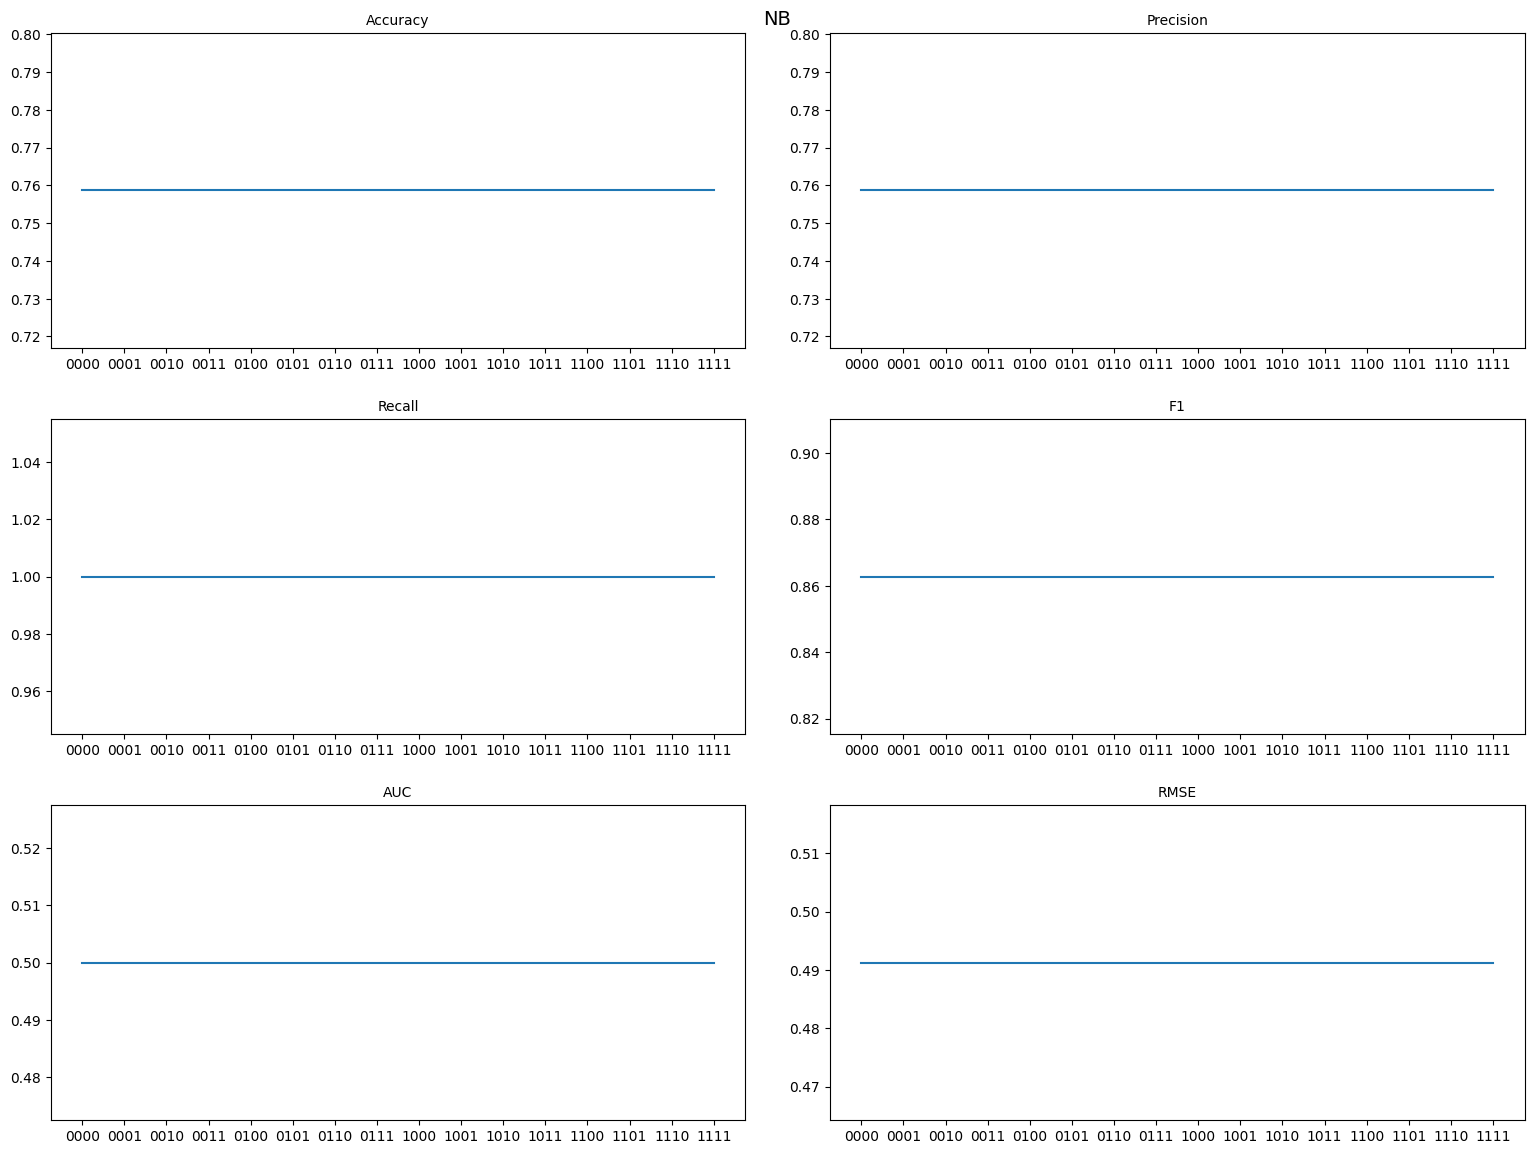

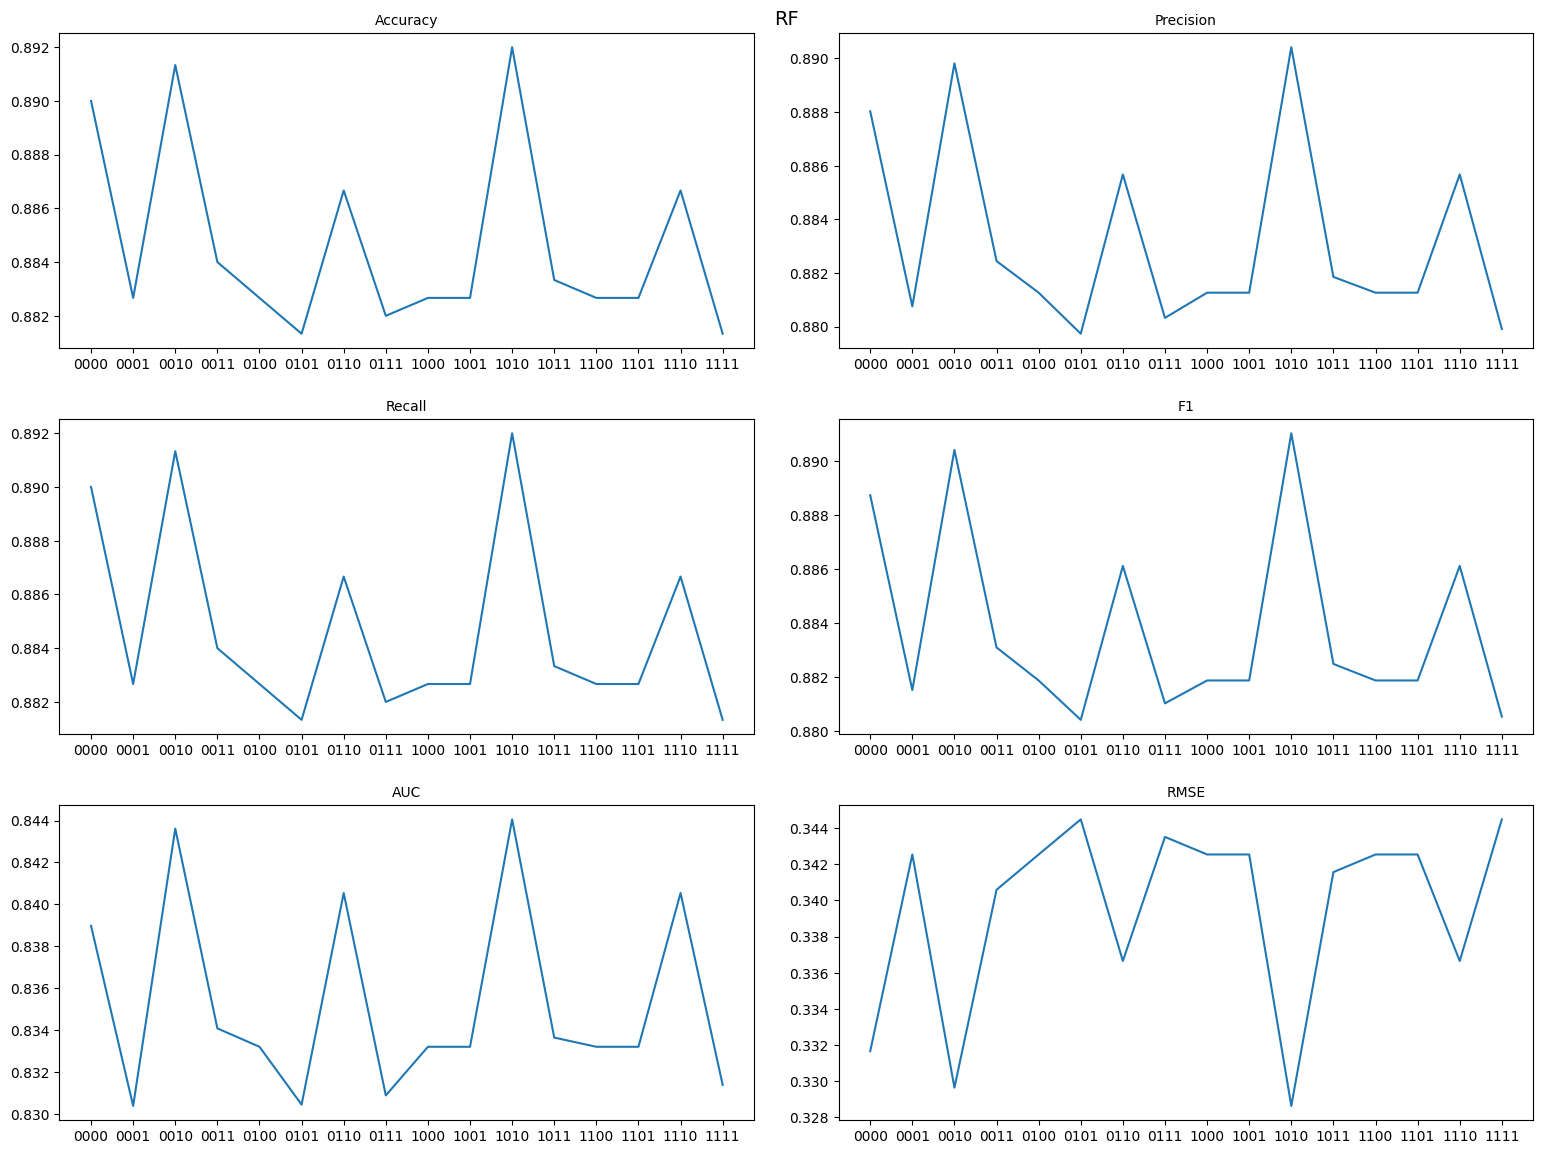

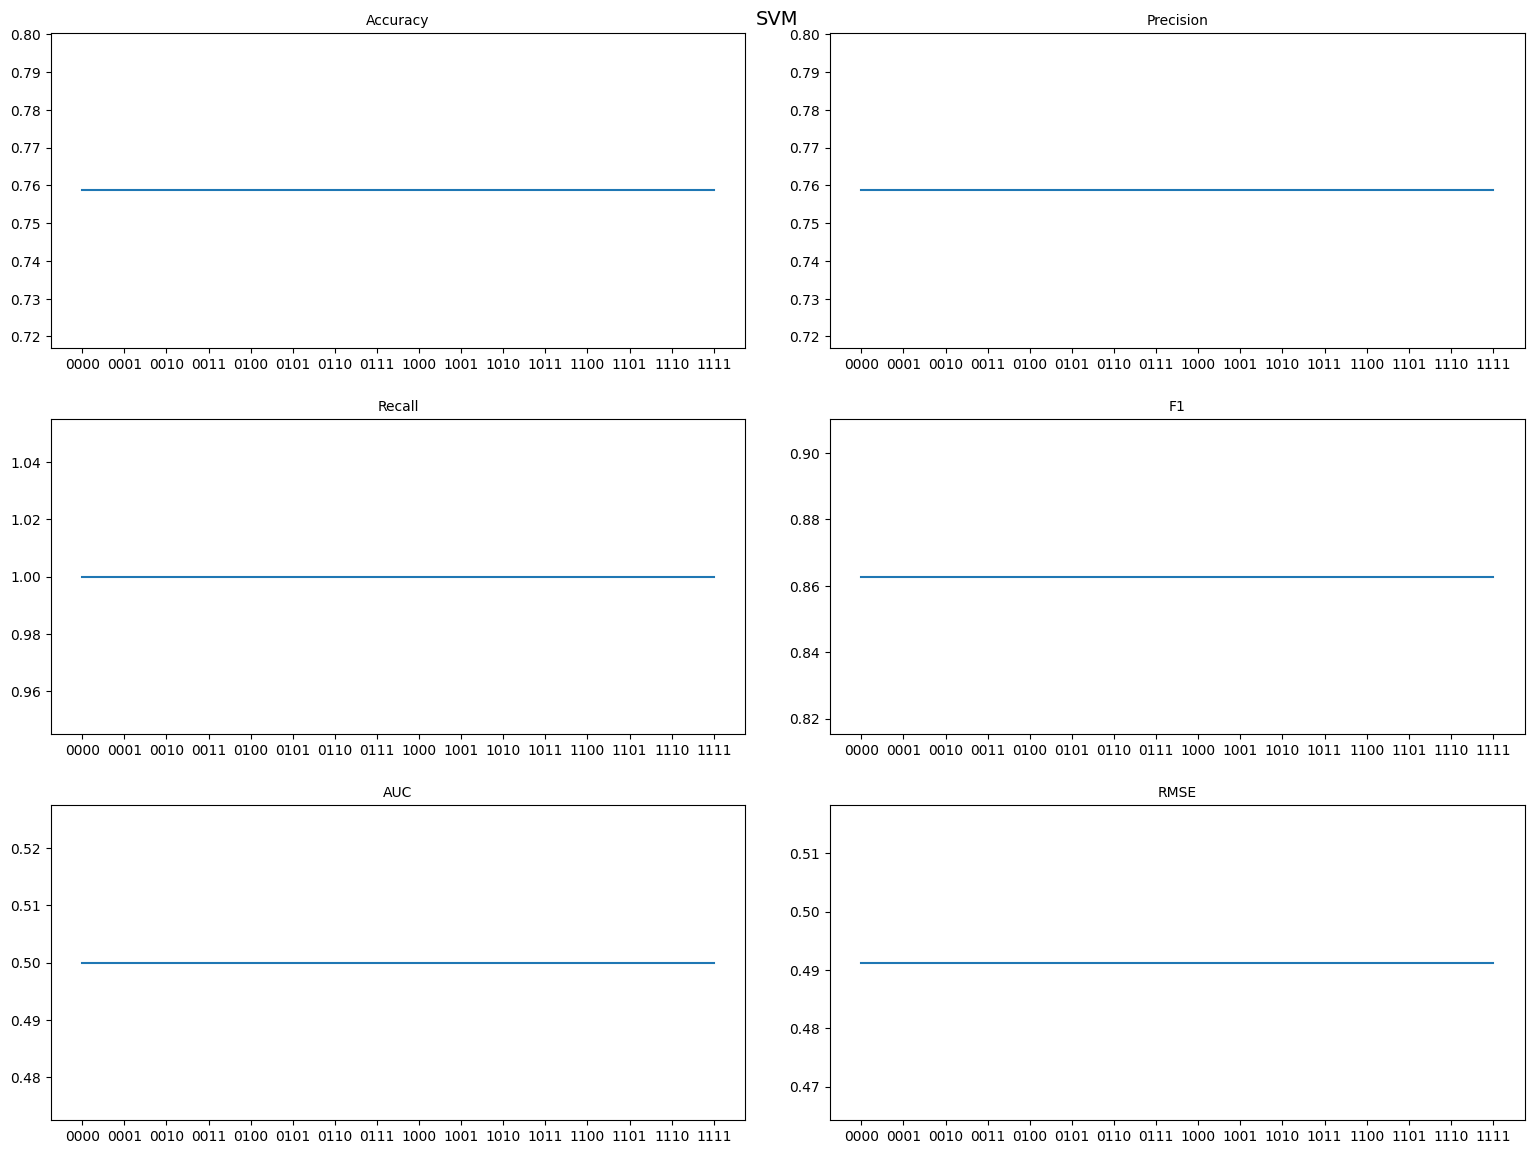

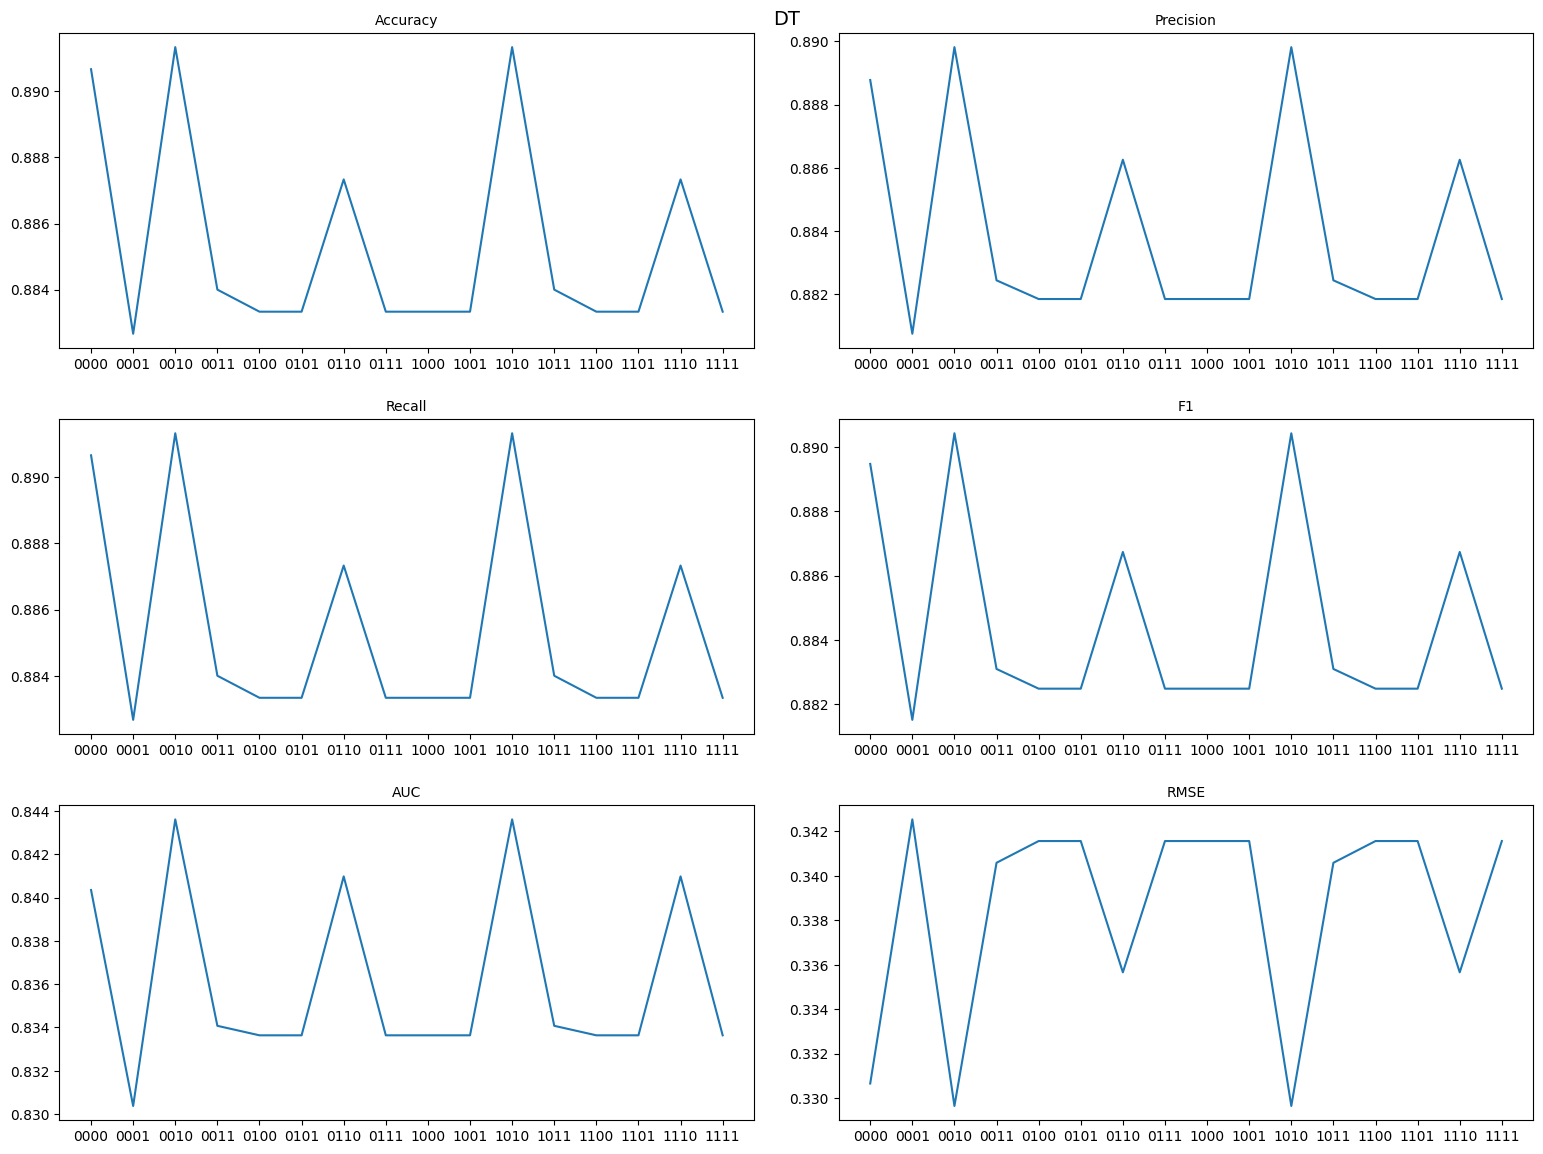

In [7]:
for metrics,algorithim in zip([knns, nbs, rfs, svms, dts],algorithims):    
    figure, axis = plt.subplots(3, 2)
    figure.set_size_inches(16, 12)
    figure.tight_layout(pad=3.0)
    figure.suptitle(algorithim, fontsize=14)

    axis[0,0].plot(file_codes,[metrics[0][0], metrics[1][0], metrics[2][0], metrics[3][0], metrics[4][0], metrics[5][0], metrics[6][0], metrics[7][0], metrics[8][0], metrics[9][0], metrics[10][0], metrics[11][0], metrics[12][0], metrics[13][0], metrics[14][0], metrics[15][0]])
    axis[0,0].set_title('Accuracy', fontsize=10)
    axis[0,1].plot(file_codes,[metrics[0][1], metrics[1][1], metrics[2][1], metrics[3][1], metrics[4][1], metrics[5][1], metrics[6][1], metrics[7][1], metrics[8][1], metrics[9][1], metrics[10][1], metrics[11][1], metrics[12][1], metrics[13][1], metrics[14][1], metrics[15][1]])
    axis[0,1].set_title('Precision', fontsize=10)
    axis[1,0].plot(file_codes,[metrics[0][2], metrics[1][2], metrics[2][2], metrics[3][2], metrics[4][2], metrics[5][2], metrics[6][2], metrics[7][2], metrics[8][2], metrics[9][2], metrics[10][2], metrics[11][2], metrics[12][2], metrics[13][2], metrics[14][2], metrics[15][2]])
    axis[1,0].set_title('Recall', fontsize=10)
    axis[1,1].plot(file_codes,[metrics[0][3], metrics[1][3], metrics[2][3], metrics[3][3], metrics[4][3], metrics[5][3], metrics[6][3], metrics[7][3], metrics[8][3], metrics[9][3], metrics[10][3], metrics[11][3], metrics[12][3], metrics[13][3], metrics[14][3], metrics[15][3]])
    axis[1,1].set_title('F1', fontsize=10)
    axis[2,0].plot(file_codes,[metrics[0][4], metrics[1][4], metrics[2][4], metrics[3][4], metrics[4][4], metrics[5][4], metrics[6][4], metrics[7][4], metrics[8][4], metrics[9][4], metrics[10][4], metrics[11][4], metrics[12][4], metrics[13][4], metrics[14][4], metrics[15][4]])
    axis[2,0].set_title('AUC', fontsize=10)
    axis[2,1].plot(file_codes,[metrics[0][5], metrics[1][5], metrics[2][5], metrics[3][5], metrics[4][5], metrics[5][5], metrics[6][5], metrics[7][5], metrics[8][5], metrics[9][5], metrics[10][5], metrics[11][5], metrics[12][5], metrics[13][5], metrics[14][5], metrics[15][5]])
    axis[2,1].set_title('RMSE', fontsize=10)

    plt.savefig('graphs/algorithms/' + algorithim + '.png')

    plt.show()

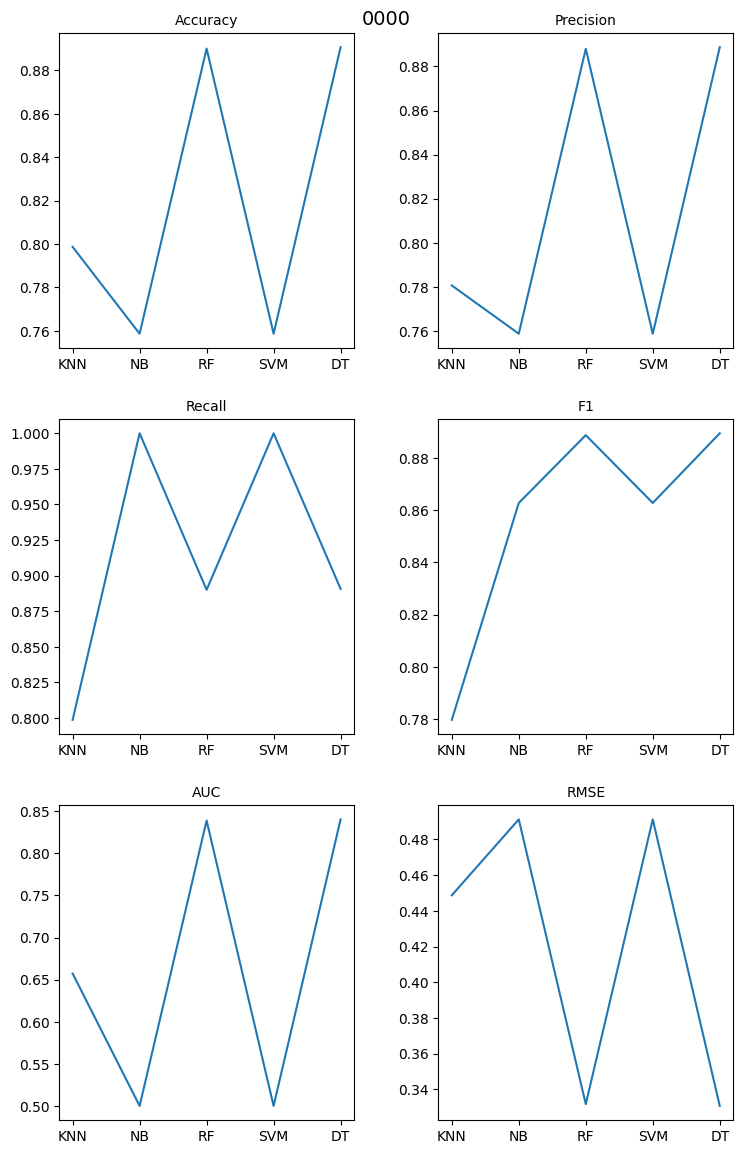

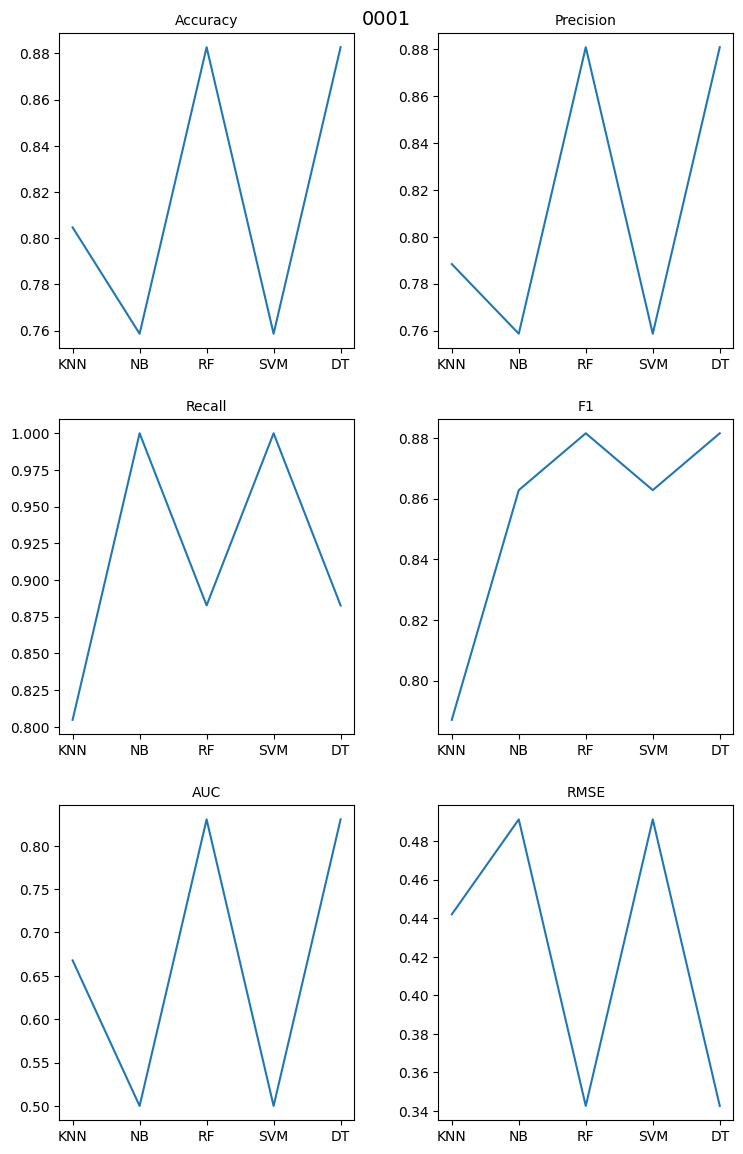

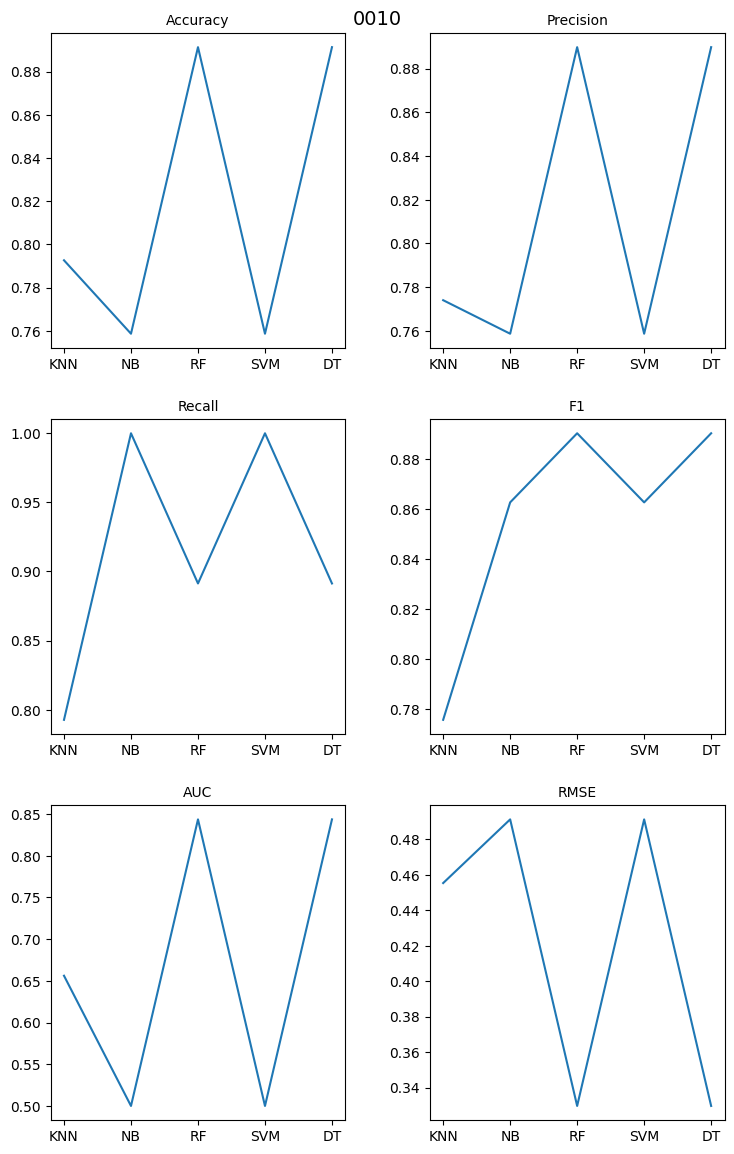

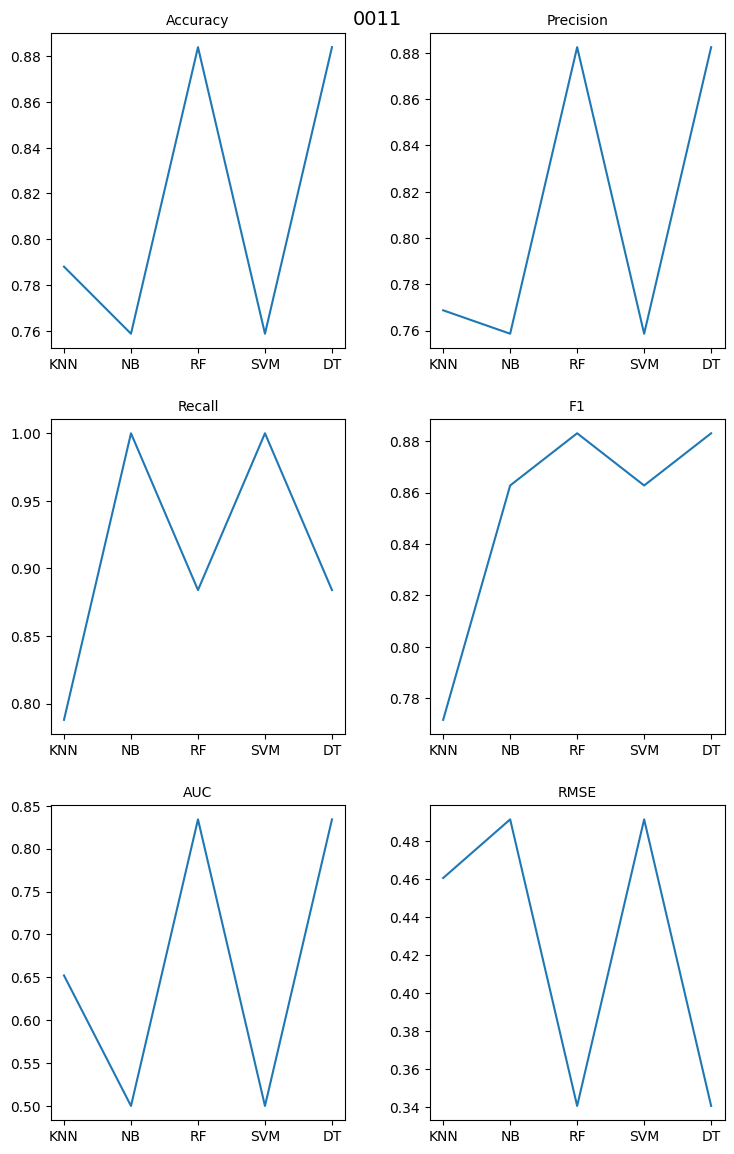

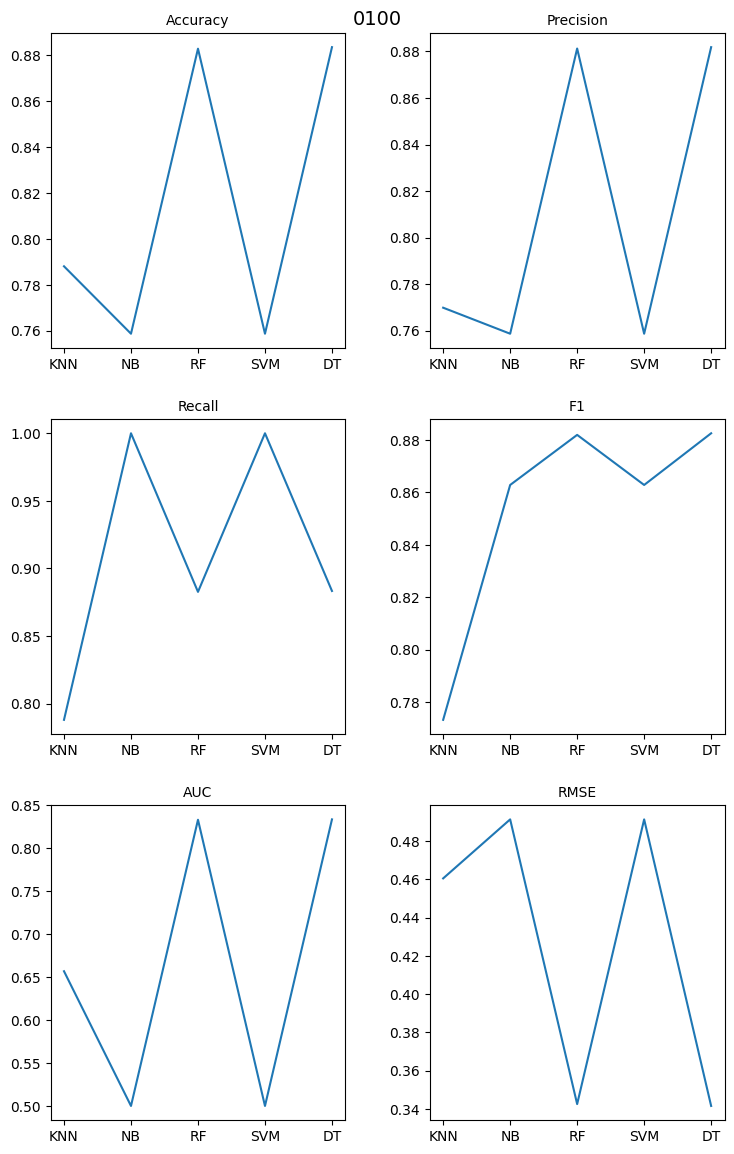

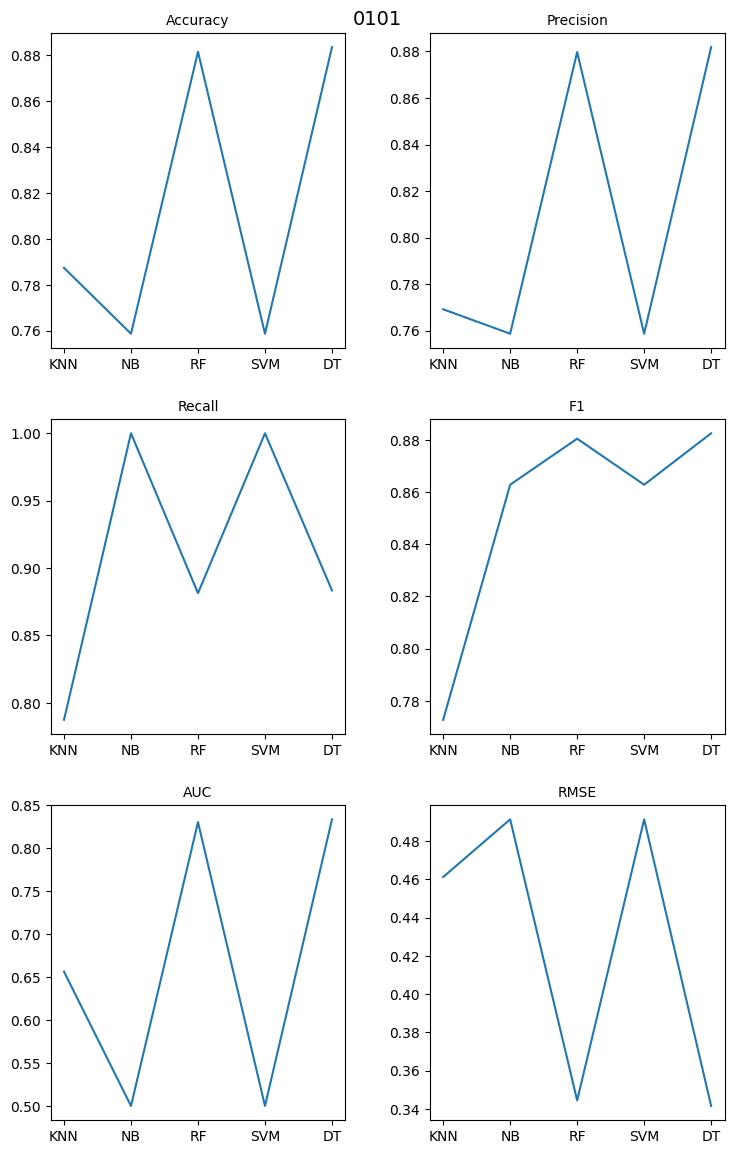

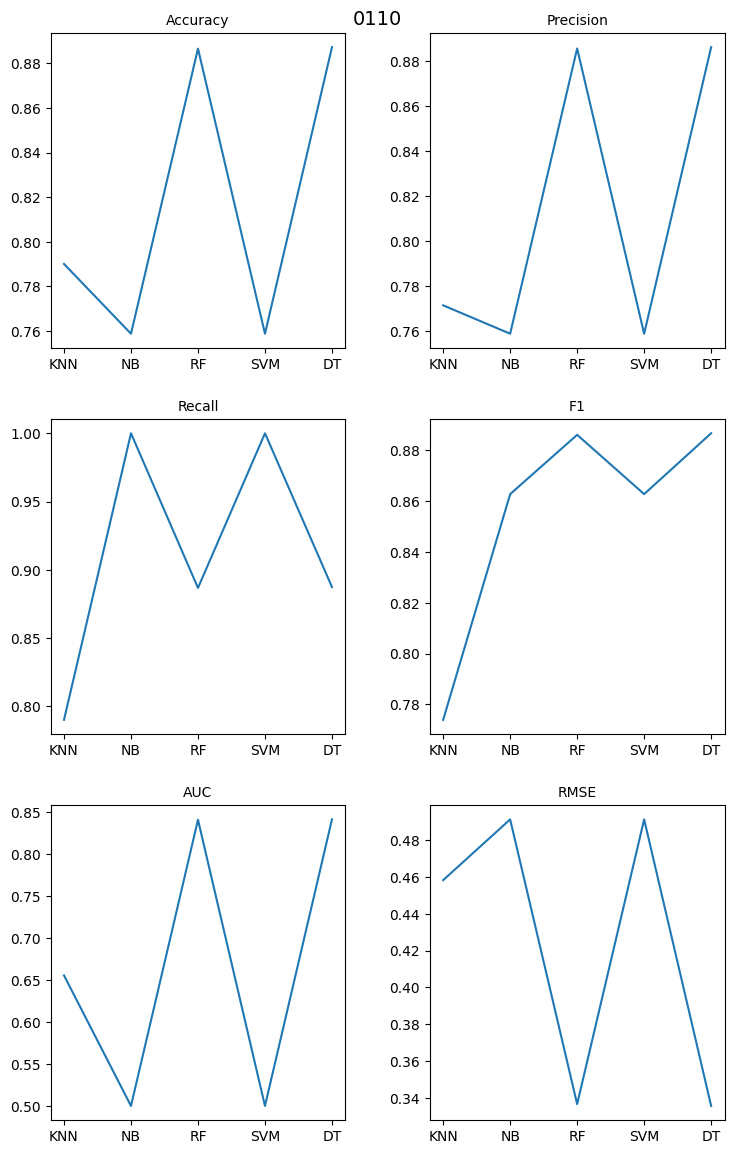

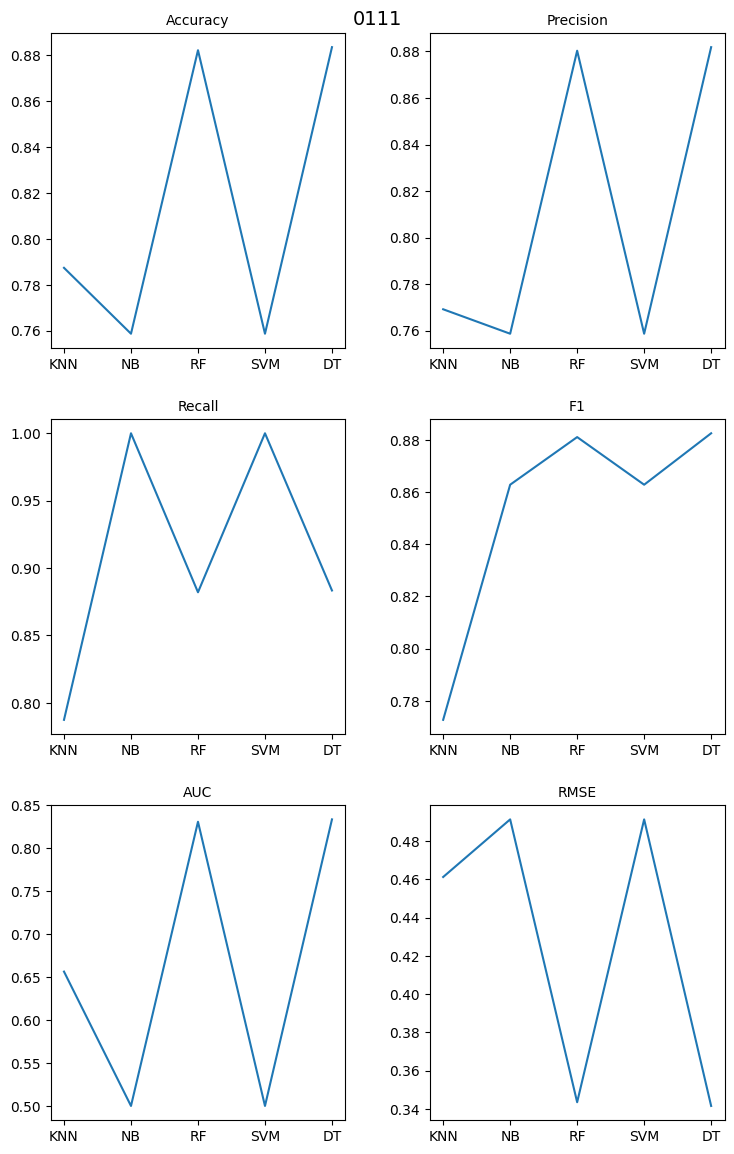

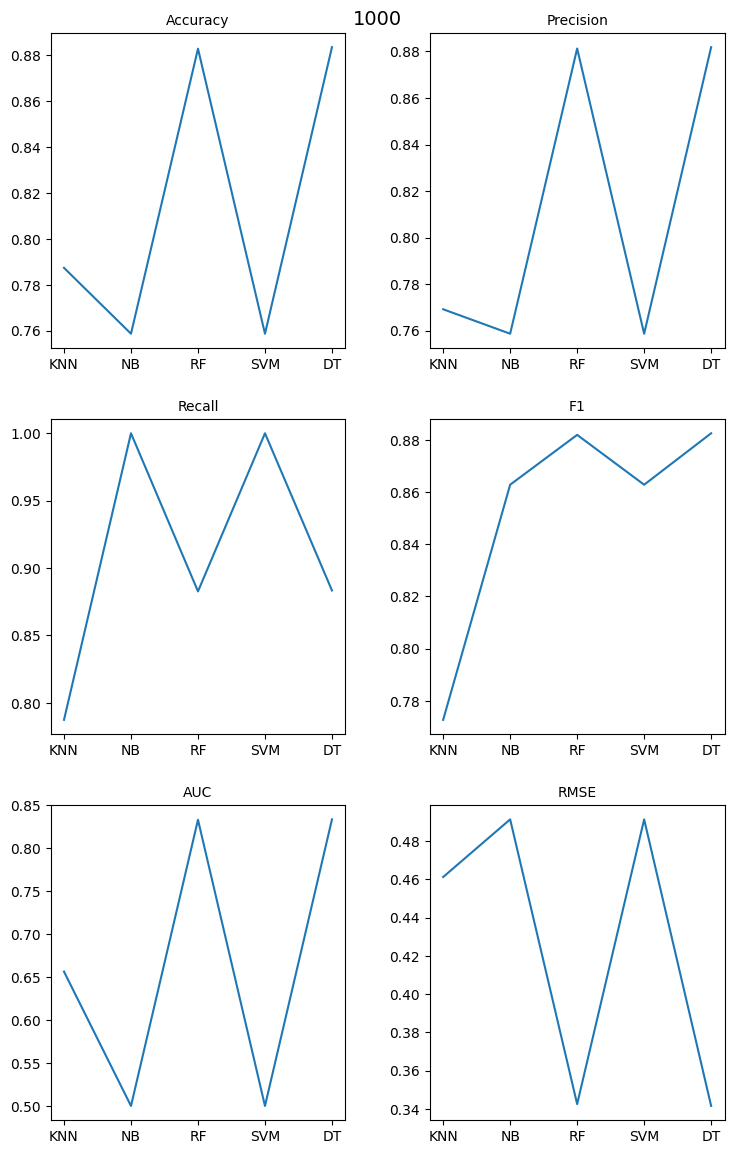

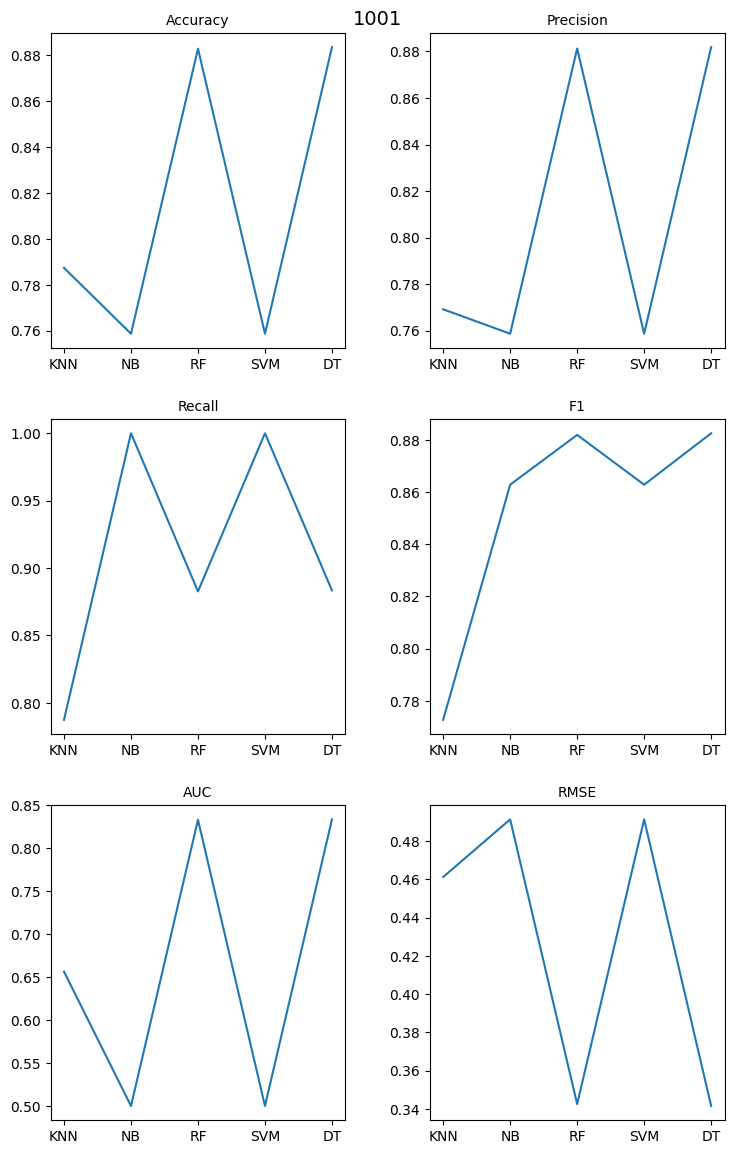

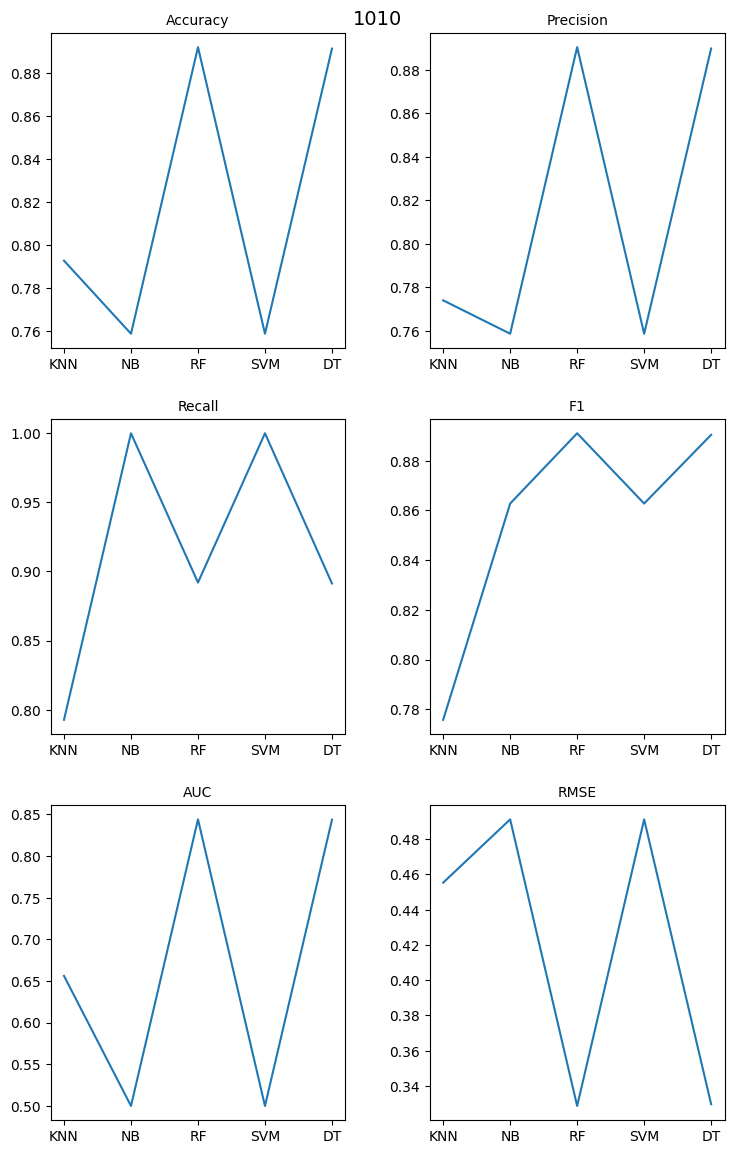

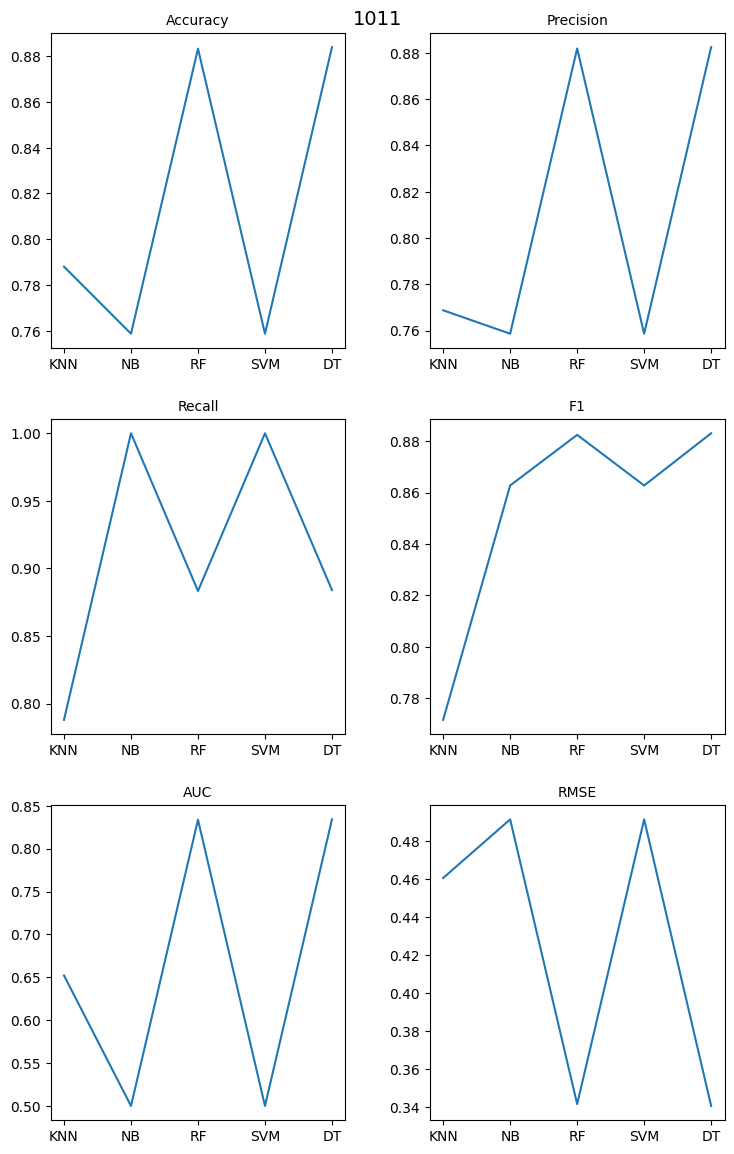

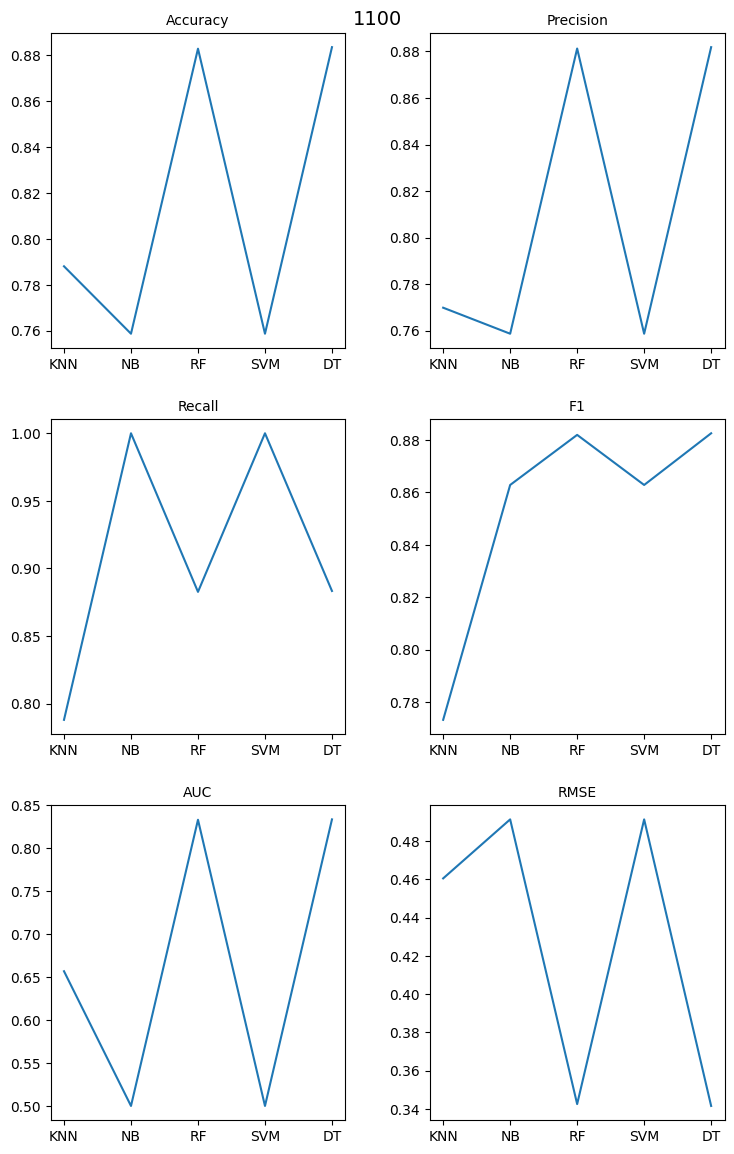

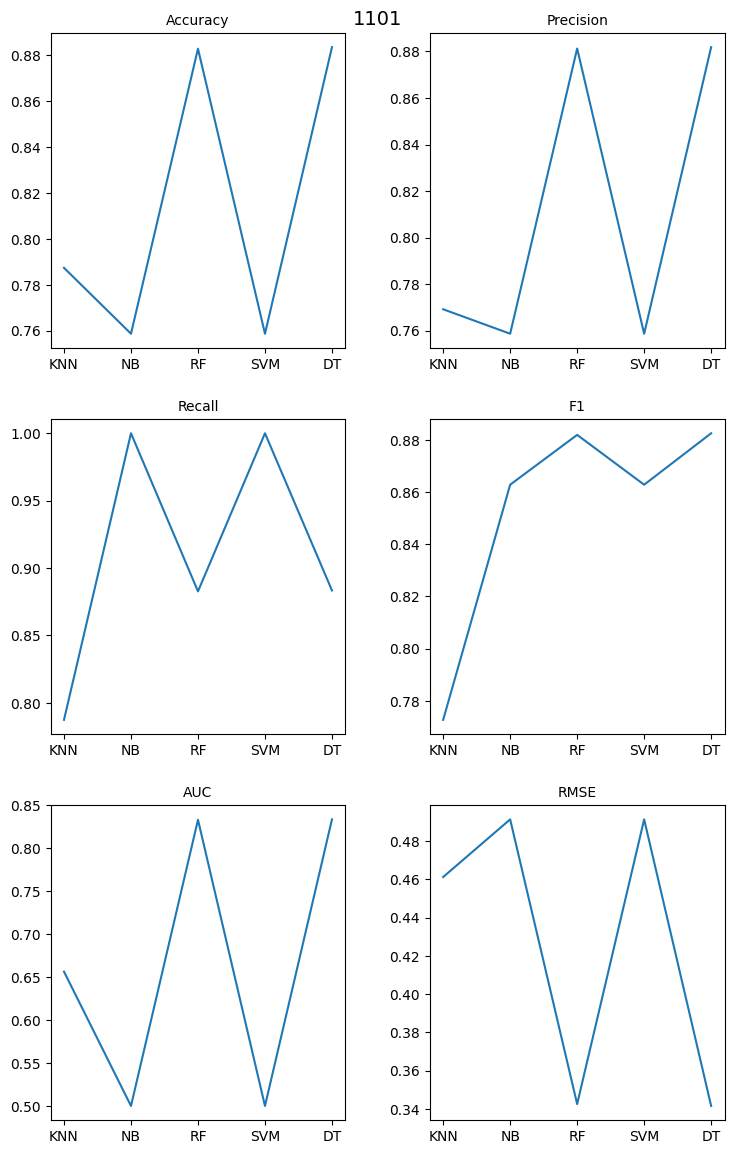

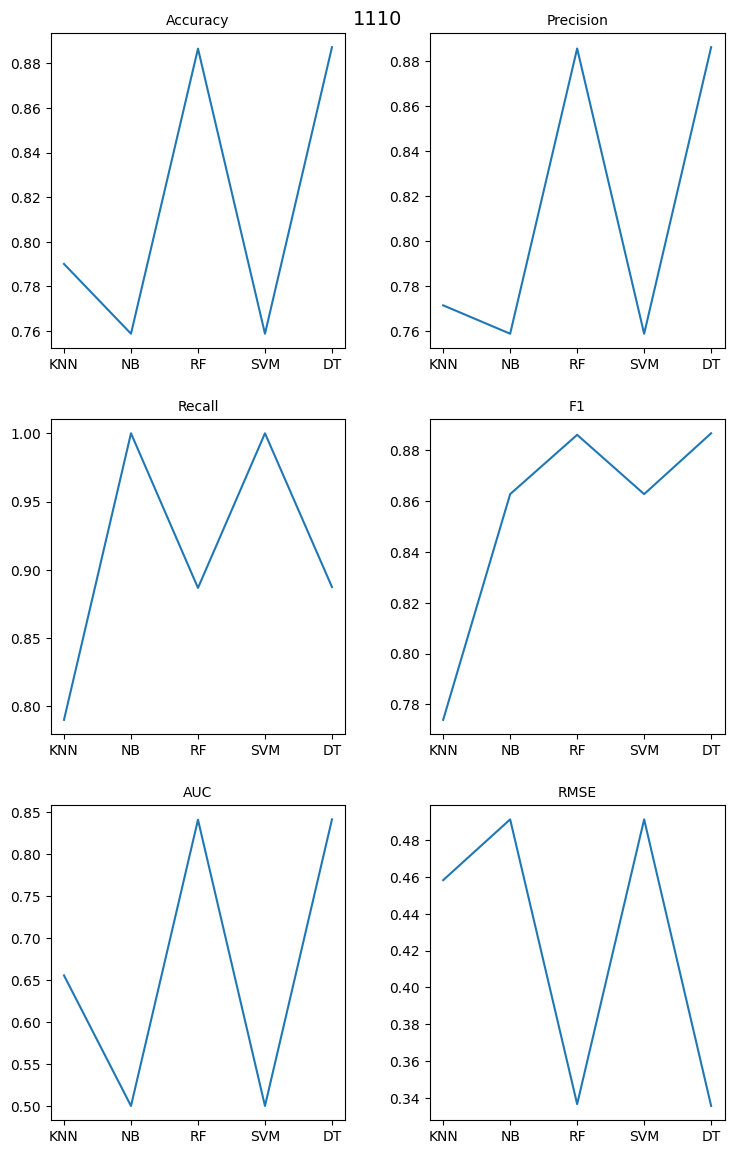

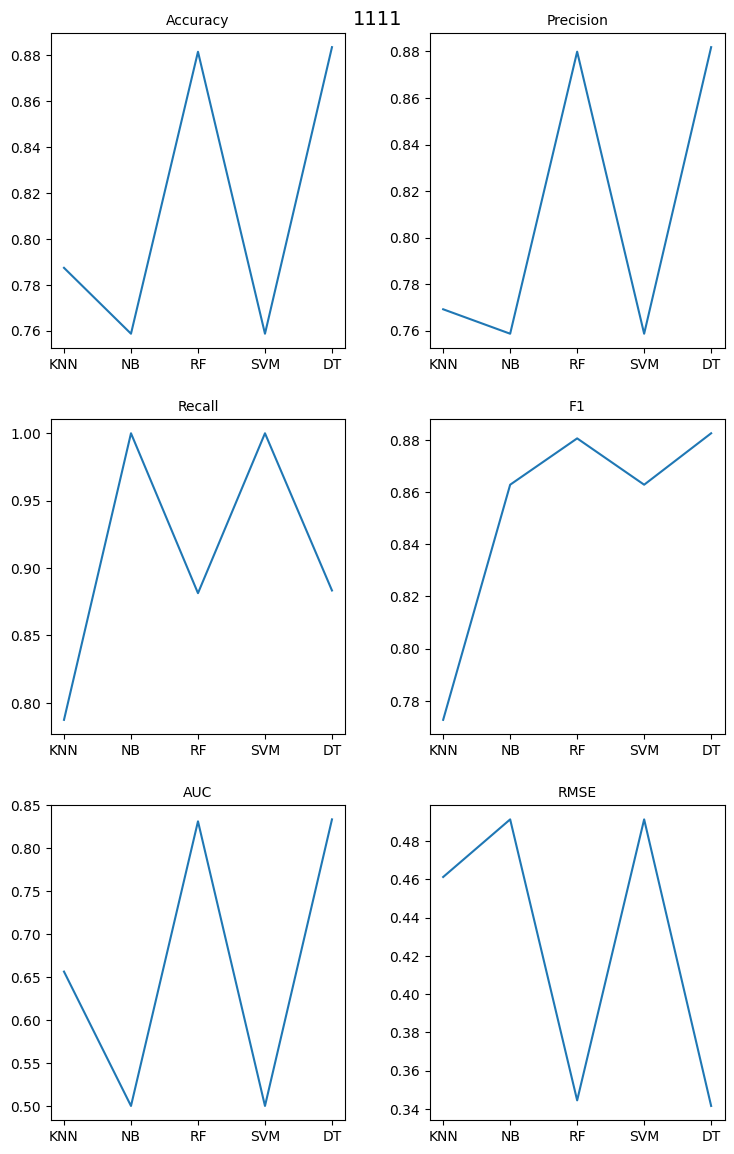

In [8]:
for index,file_name in enumerate(file_codes):
    figure, axis = plt.subplots(3, 2)
    figure.set_size_inches(8, 12)
    figure.tight_layout(pad=3.0)
    figure.suptitle(file_name, fontsize=14)

    axis[0,0].plot(algorithims,[knns[index][0], nbs[index][0], rfs[index][0], svms[index][0], dts[index][0]])
    axis[0,0].set_title('Accuracy', fontsize=10)
    axis[0,1].plot(algorithims,[knns[index][1], nbs[index][1], rfs[index][1], svms[index][1], dts[index][1]])
    axis[0,1].set_title('Precision', fontsize=10)
    axis[1,0].plot(algorithims,[knns[index][2], nbs[index][2], rfs[index][2], svms[index][2], dts[index][2]])
    axis[1,0].set_title('Recall', fontsize=10)
    axis[1,1].plot(algorithims,[knns[index][3], nbs[index][3], rfs[index][3], svms[index][3], dts[index][3]])
    axis[1,1].set_title('F1', fontsize=10)
    axis[2,0].plot(algorithims,[knns[index][4], nbs[index][4], rfs[index][4], svms[index][4], dts[index][4]])
    axis[2,0].set_title('AUC', fontsize=10)
    axis[2,1].plot(algorithims,[knns[index][5], nbs[index][5], rfs[index][5], svms[index][5], dts[index][5]])
    axis[2,1].set_title('RMSE', fontsize=10)

    plt.savefig('graphs/datasets/' + file_name + '.png')

    plt.show()

In [9]:
for index,name in enumerate(file_codes):
    print(name)
    print('\tKNN')
    print('\t\tAccuracy: ' + str(knns[index][0]))
    print('\t\tPrecision: ' + str(knns[index][1]))
    print('\t\tRecall: ' + str(knns[index][2]))
    print('\t\tF1: ' + str(knns[index][3]))
    print('\t\tAUC: ' + str(knns[index][4]))
    print('\t\tRMSE: ' + str(knns[index][5]))
    print('\tNB')
    print('\t\tAccuracy: ' + str(nbs[index][0]))
    print('\t\tPrecision: ' + str(nbs[index][1]))
    print('\t\tRecall: ' + str(nbs[index][2]))
    print('\t\tF1: ' + str(nbs[index][3]))
    print('\t\tAUC: ' + str(nbs[index][4]))
    print('\t\tRMSE: ' + str(nbs[index][5]))
    print('\tRF')
    print('\tAccuracy: ' + str(rfs[index][0]))
    print('\t\tPrecision: ' + str(rfs[index][1]))
    print('\t\tRecall: ' + str(rfs[index][2]))
    print('\t\tF1: ' + str(rfs[index][3]))
    print('\t\tAUC: ' + str(rfs[index][4]))
    print('\t\tRMSE: ' + str(rfs[index][5]))
    print('\tSVM')
    print('\tAccuracy: ' + str(svms[index][0]))
    print('\t\tPrecision: ' + str(svms[index][1]))
    print('\t\tRecall: ' + str(svms[index][2]))
    print('\t\tF1: ' + str(svms[index][3]))
    print('\t\tAUC: ' + str(svms[index][4]))
    print('\t\tRMSE: ' + str(svms[index][5]))
    print('\tDT')
    print('\tAccuracy: ' + str(dts[index][0]))
    print('\t\tPrecision: ' + str(dts[index][1]))
    print('\t\tRecall: ' + str(dts[index][2]))
    print('\t\tF1: ' + str(dts[index][3]))
    print('\t\tAUC: ' + str(dts[index][4]))
    print('\t\tRMSE: ' + str(dts[index][5]))
    print('')

0000
	KNN
		Accuracy: 0.7986666666666666
		Precision: 0.7805765837972969
		Recall: 0.7986666666666666
		F1: 0.7796636458630188
		AUC: 0.6572789327015507
		RMSE: 0.44870183121236906
	NB
		Accuracy: 0.7586666666666667
		Precision: 0.7586666666666667
		Recall: 1.0
		F1: 0.8627748294162245
		AUC: 0.5
		RMSE: 0.49125689138508105
	RF
	Accuracy: 0.89
		Precision: 0.8880300524164146
		Recall: 0.89
		F1: 0.8887456743271744
		AUC: 0.8389706667702377
		RMSE: 0.33166247903553997
	SVM
	Accuracy: 0.7586666666666667
		Precision: 0.7586666666666667
		Recall: 1.0
		F1: 0.8627748294162245
		AUC: 0.5
		RMSE: 0.49125689138508105
	DT
	Accuracy: 0.8906666666666667
		Precision: 0.888779783637593
		Recall: 0.8906666666666667
		F1: 0.8894768199276465
		AUC: 0.8403518822398508
		RMSE: 0.3306559138036599

0001
	KNN
		Accuracy: 0.8046666666666666
		Precision: 0.7883438926950662
		Recall: 0.8046666666666666
		F1: 0.7870817929252713
		AUC: 0.6678261756109876
		RMSE: 0.4419653078391259
	NB
		Accuracy: 0.758666666666

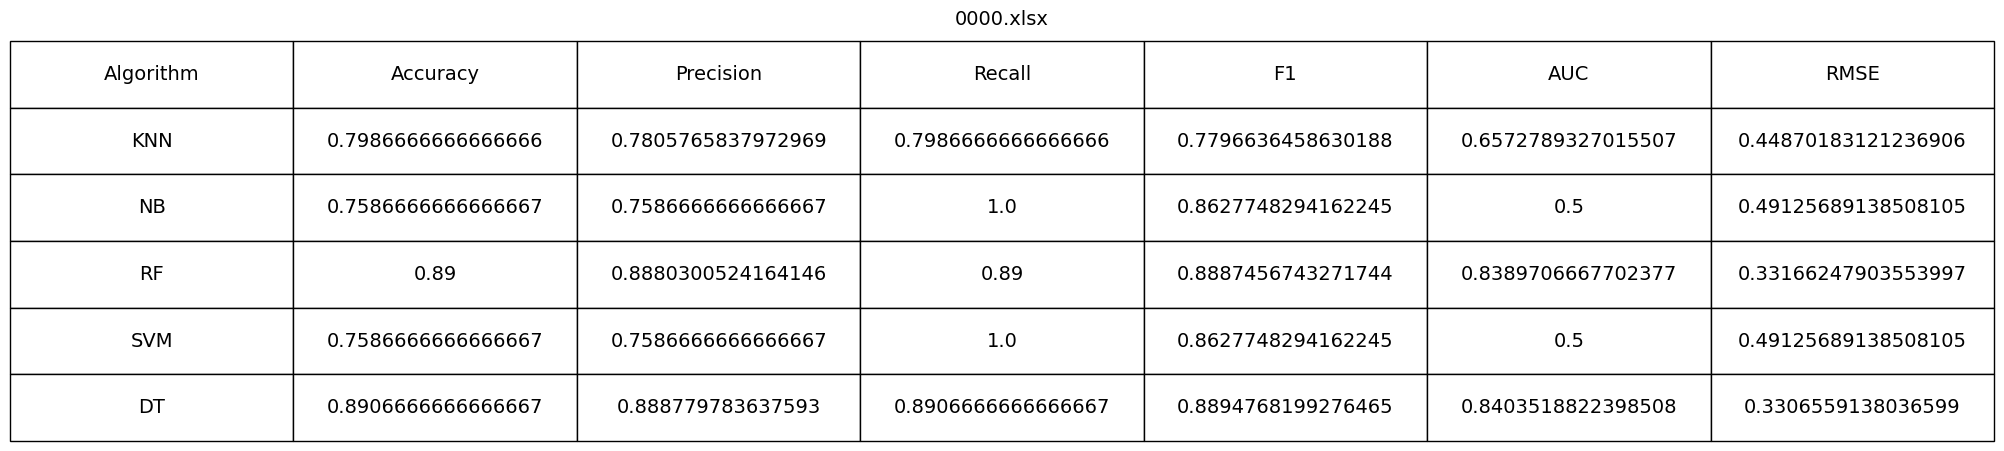

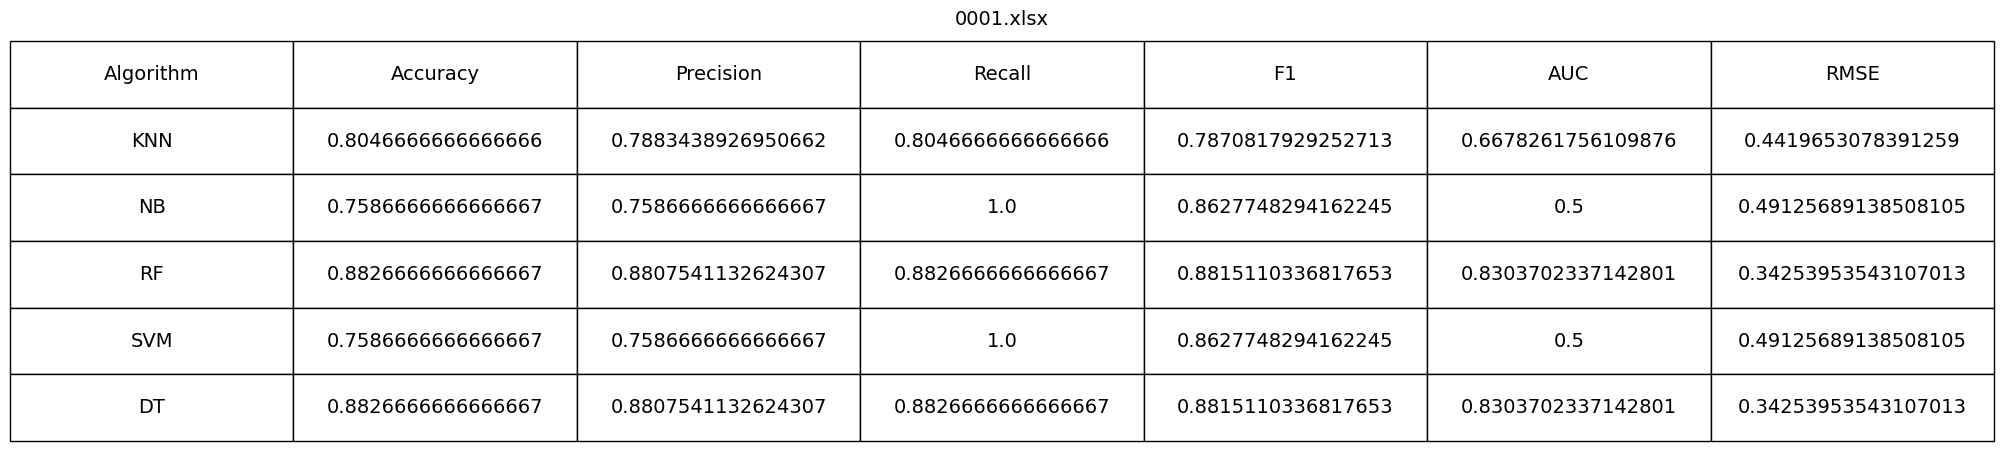

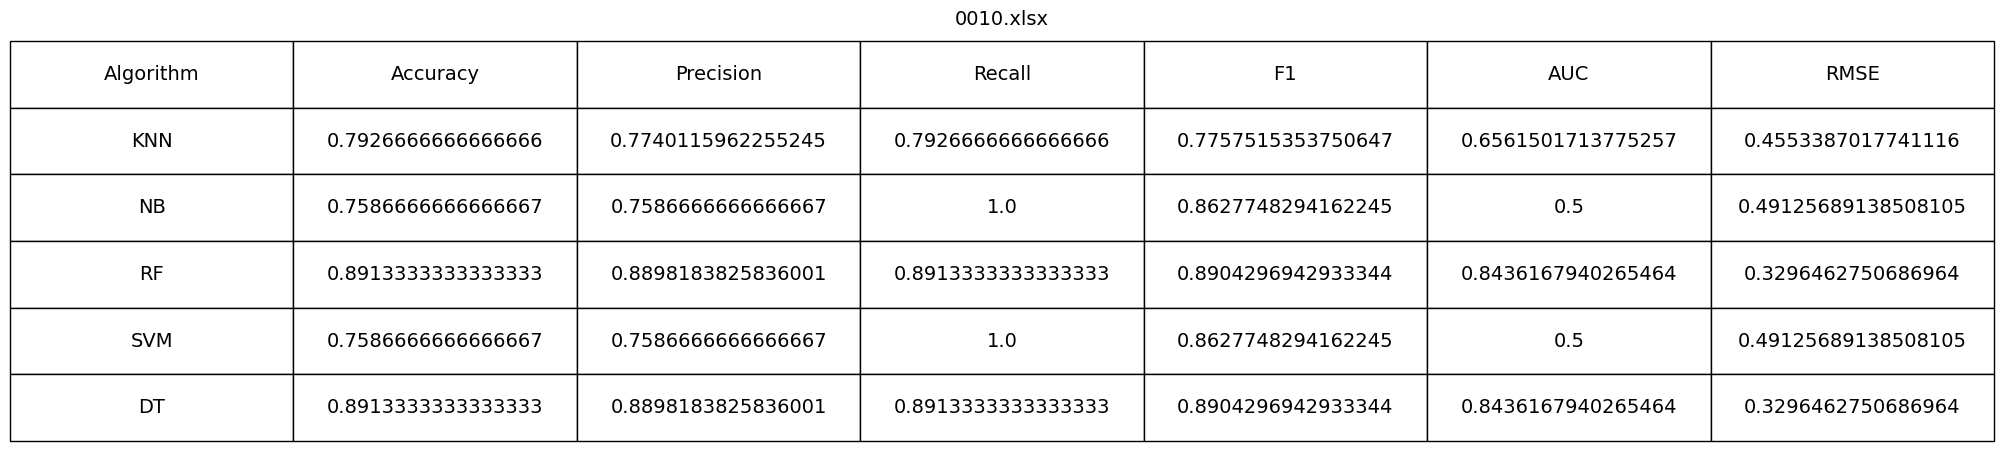

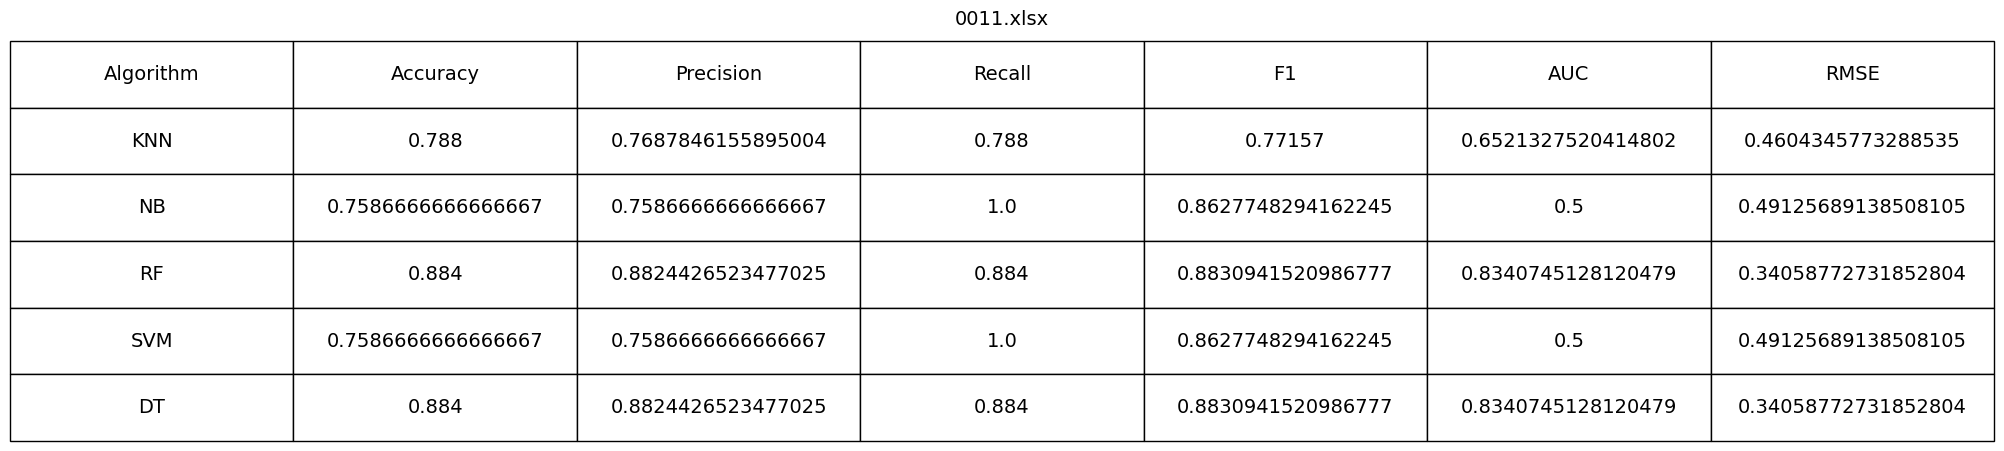

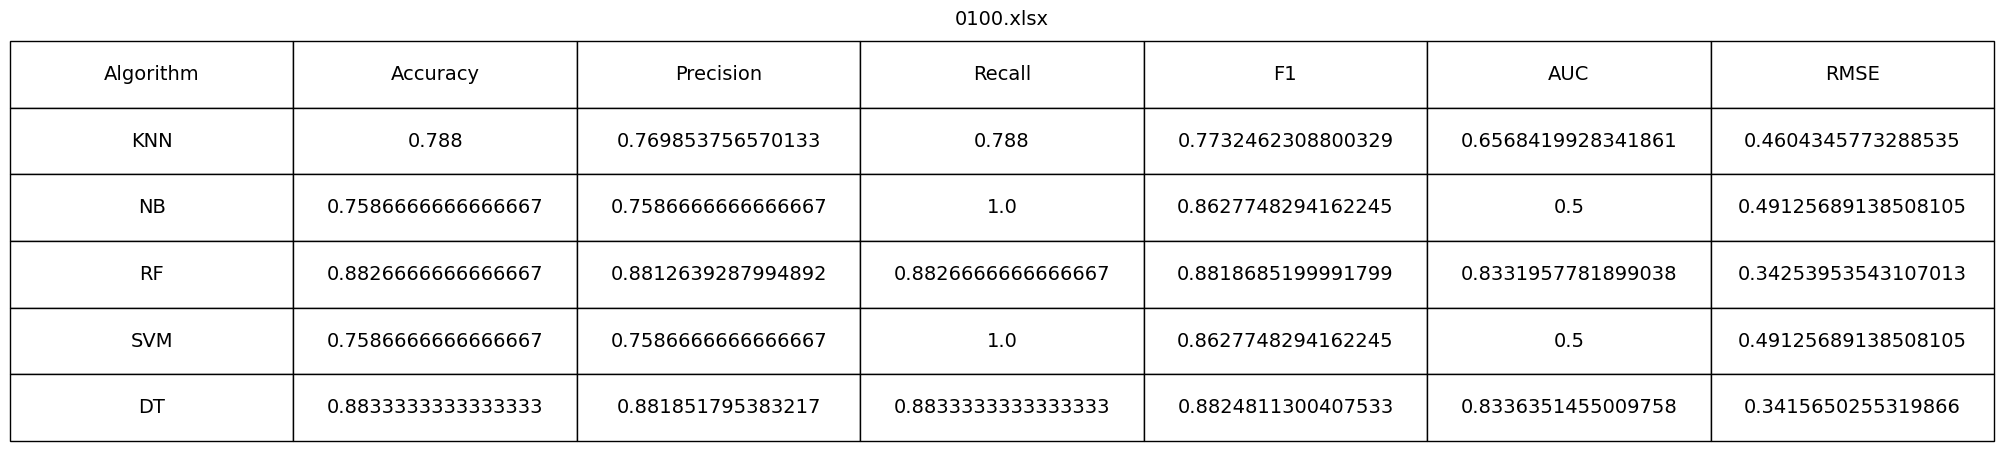

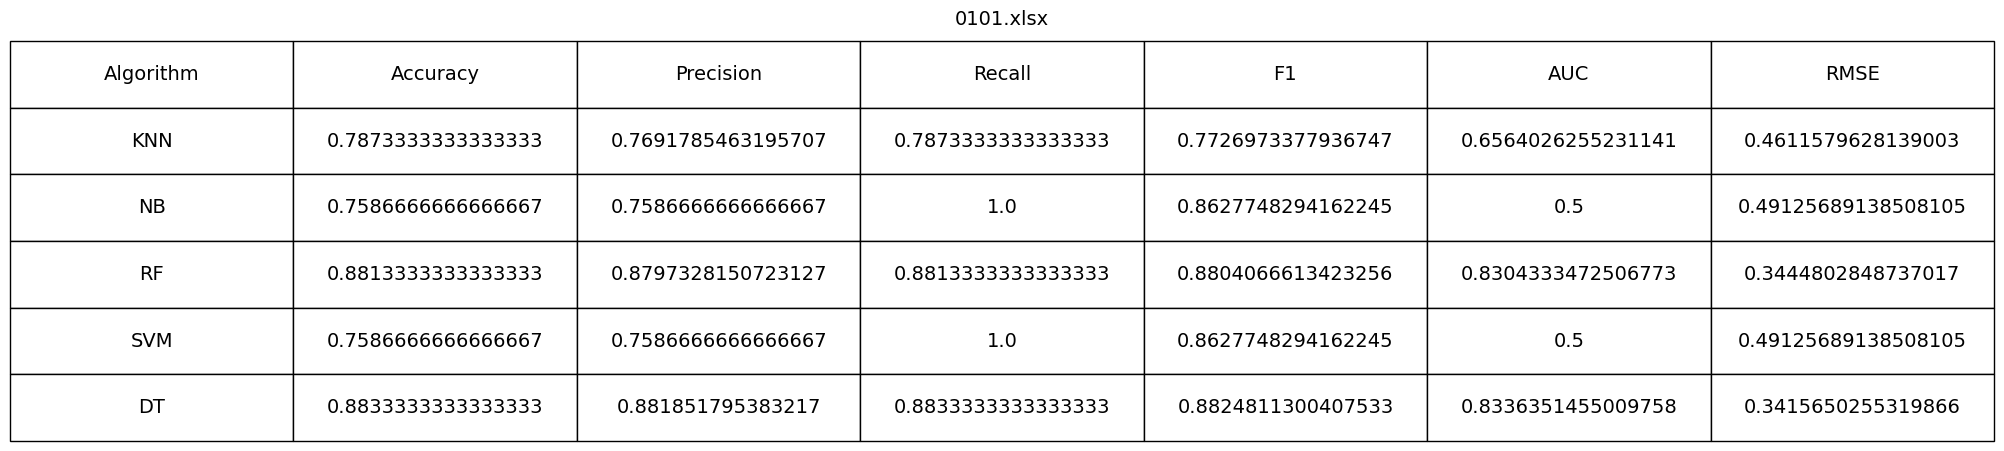

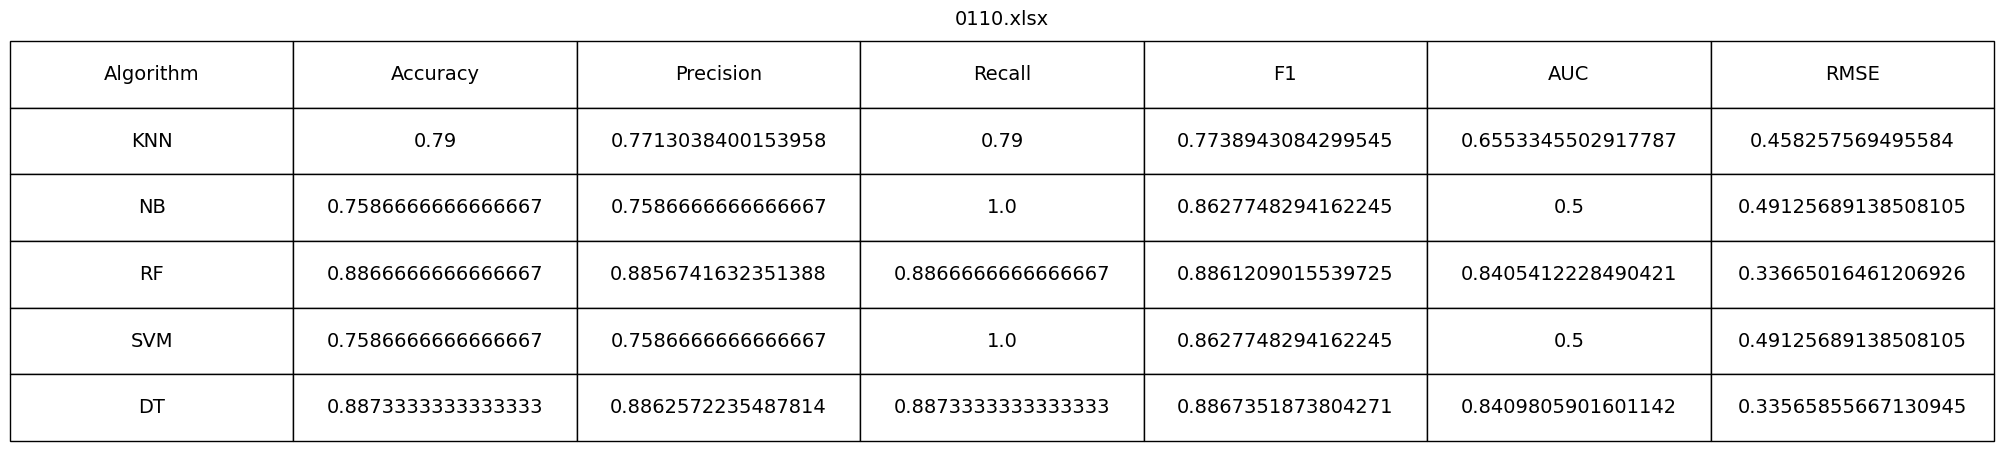

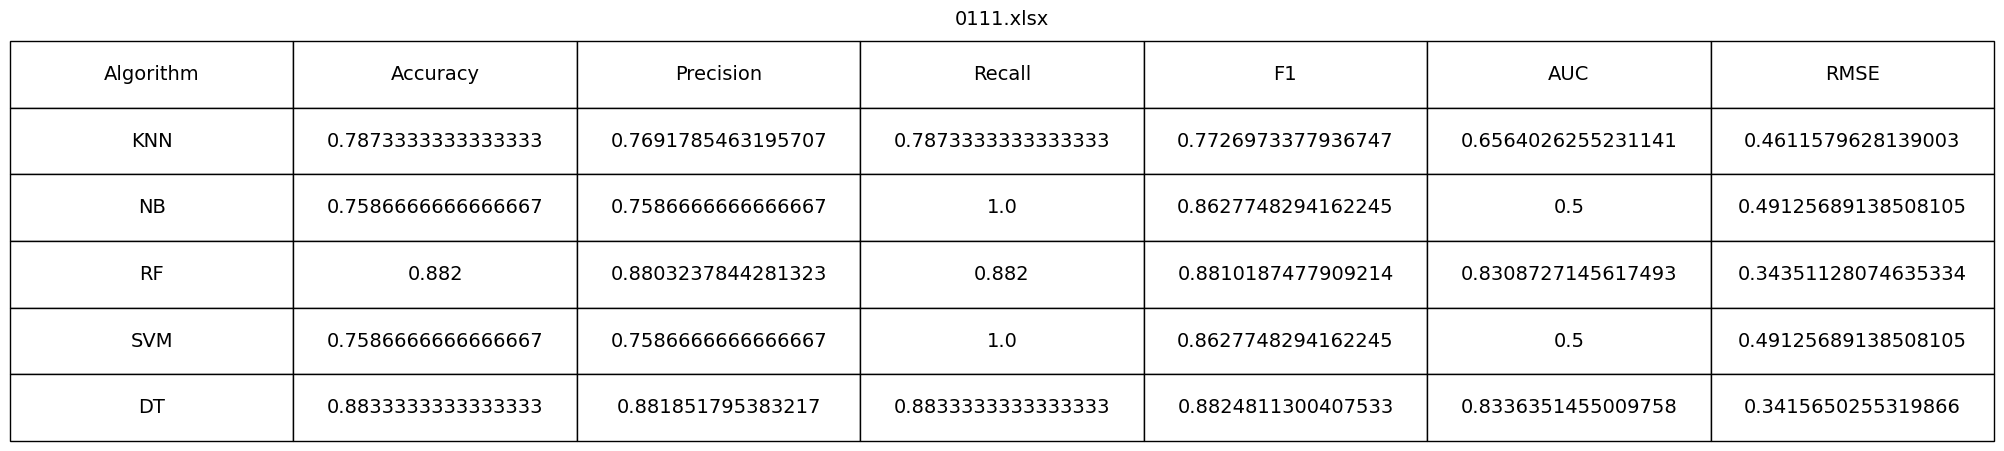

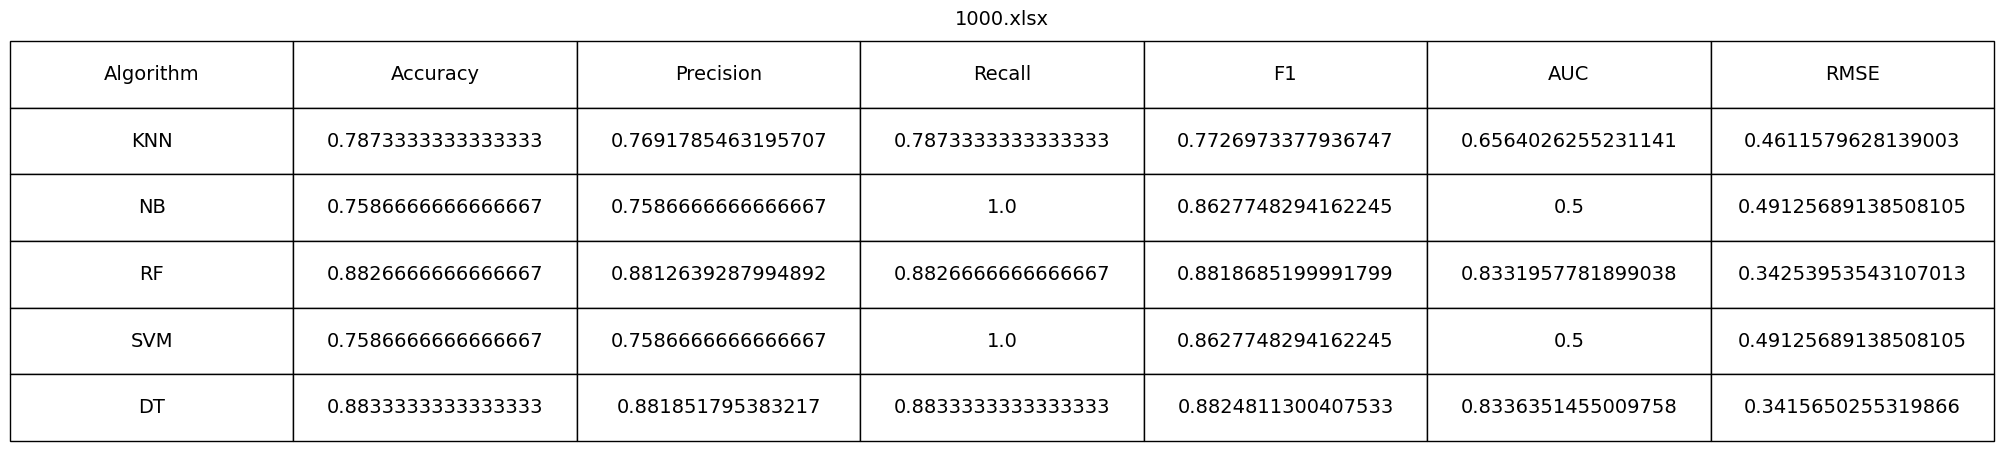

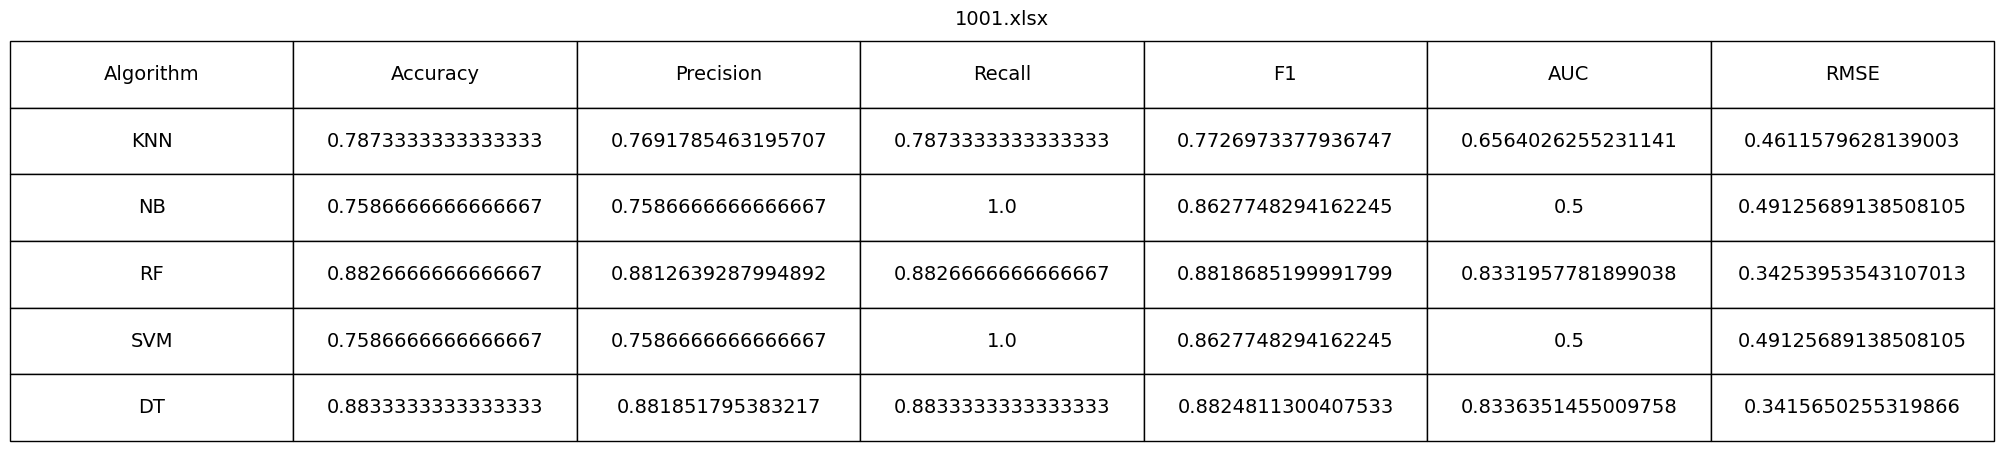

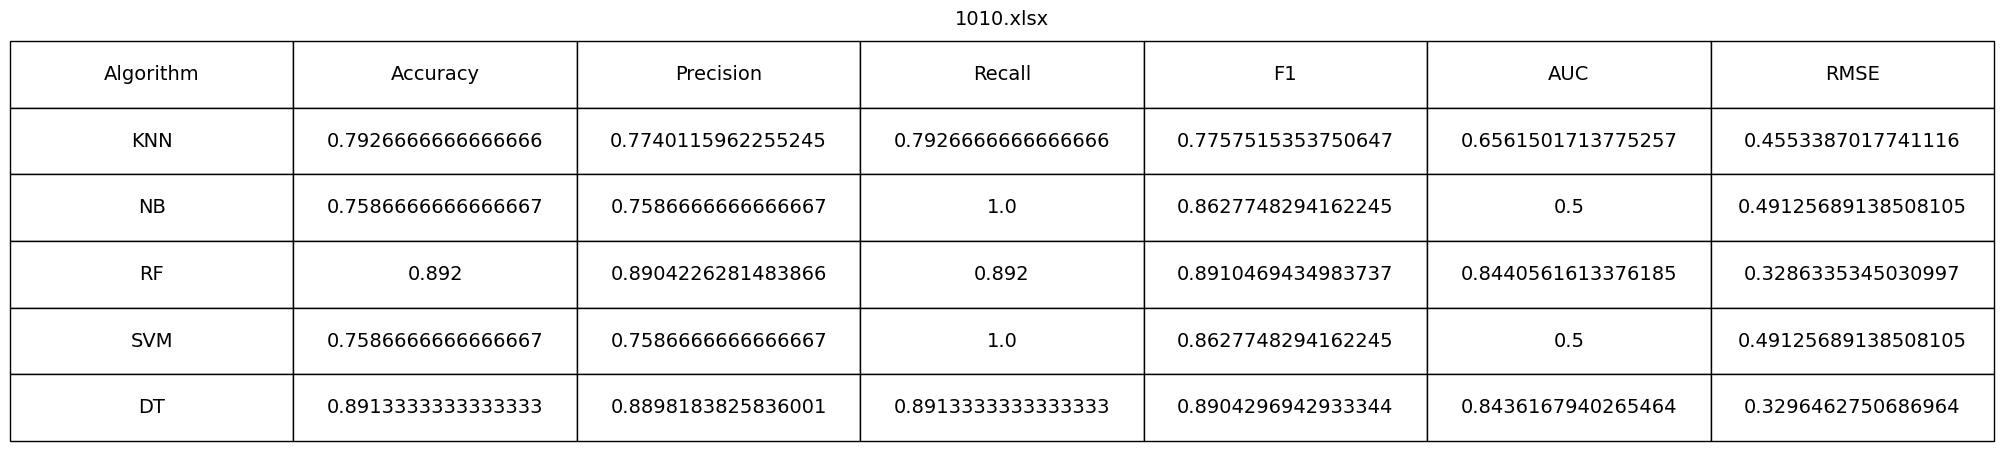

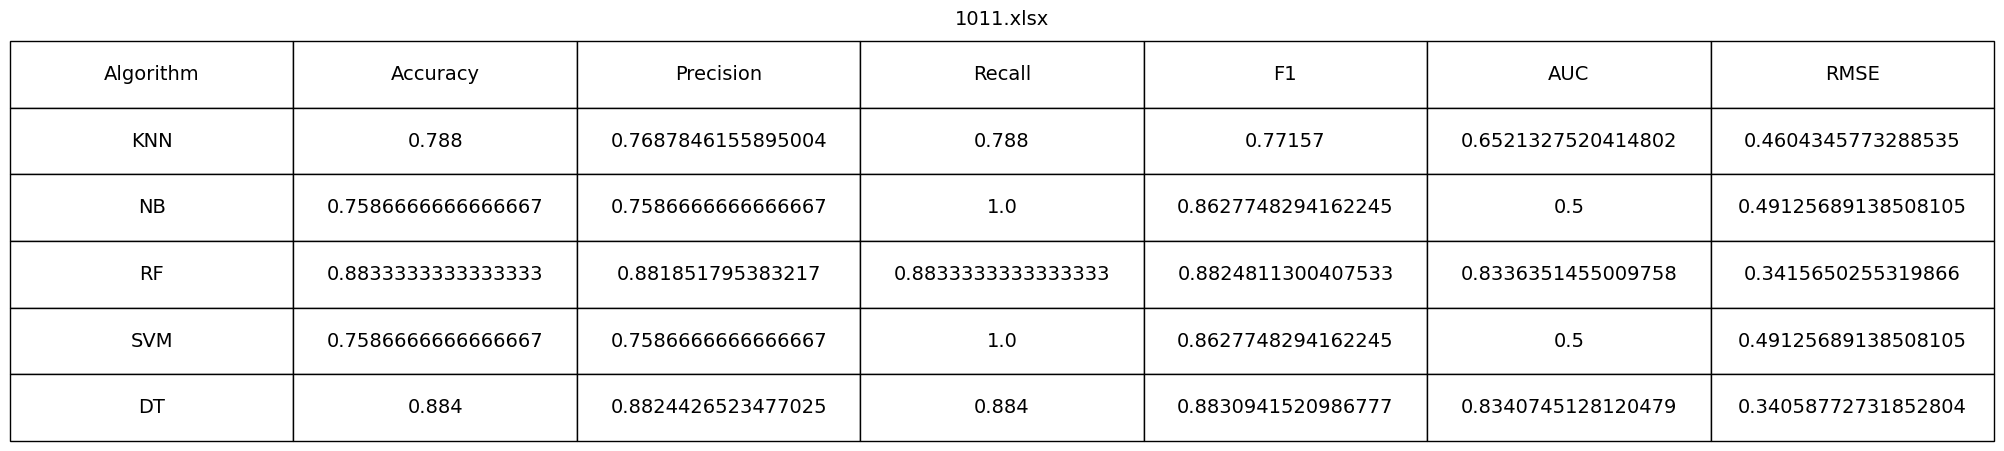

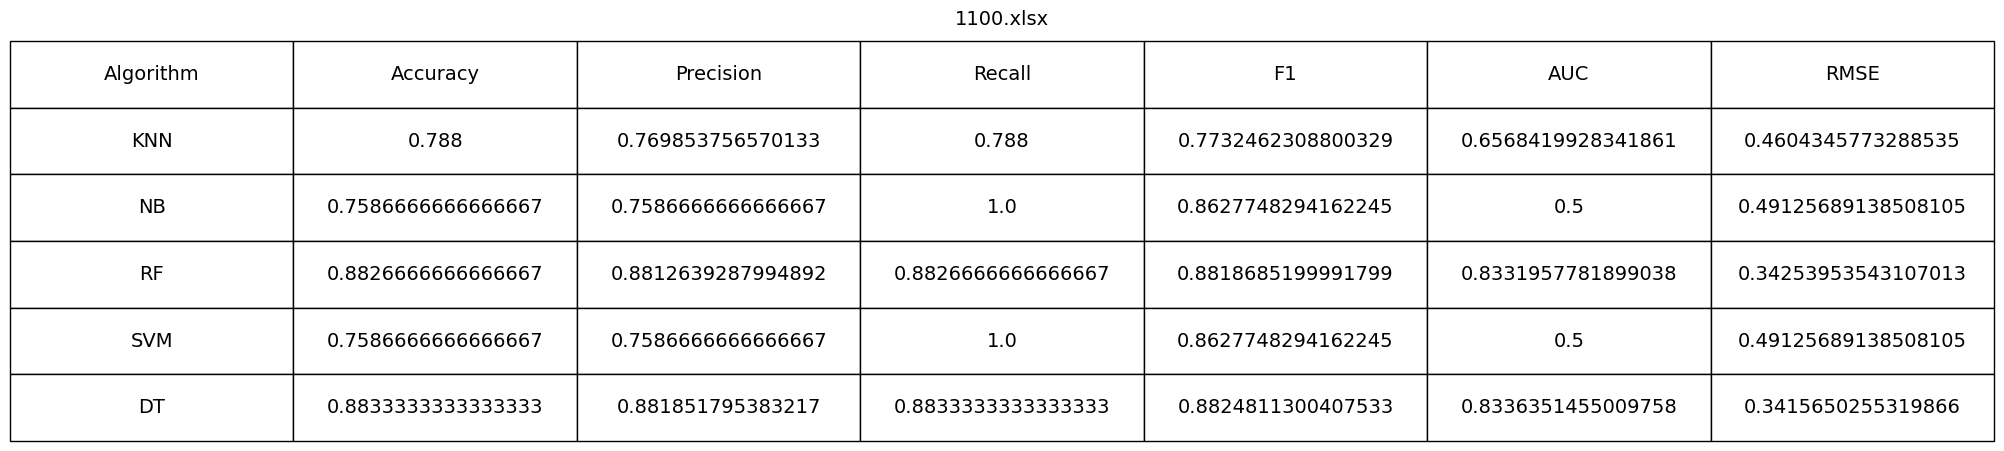

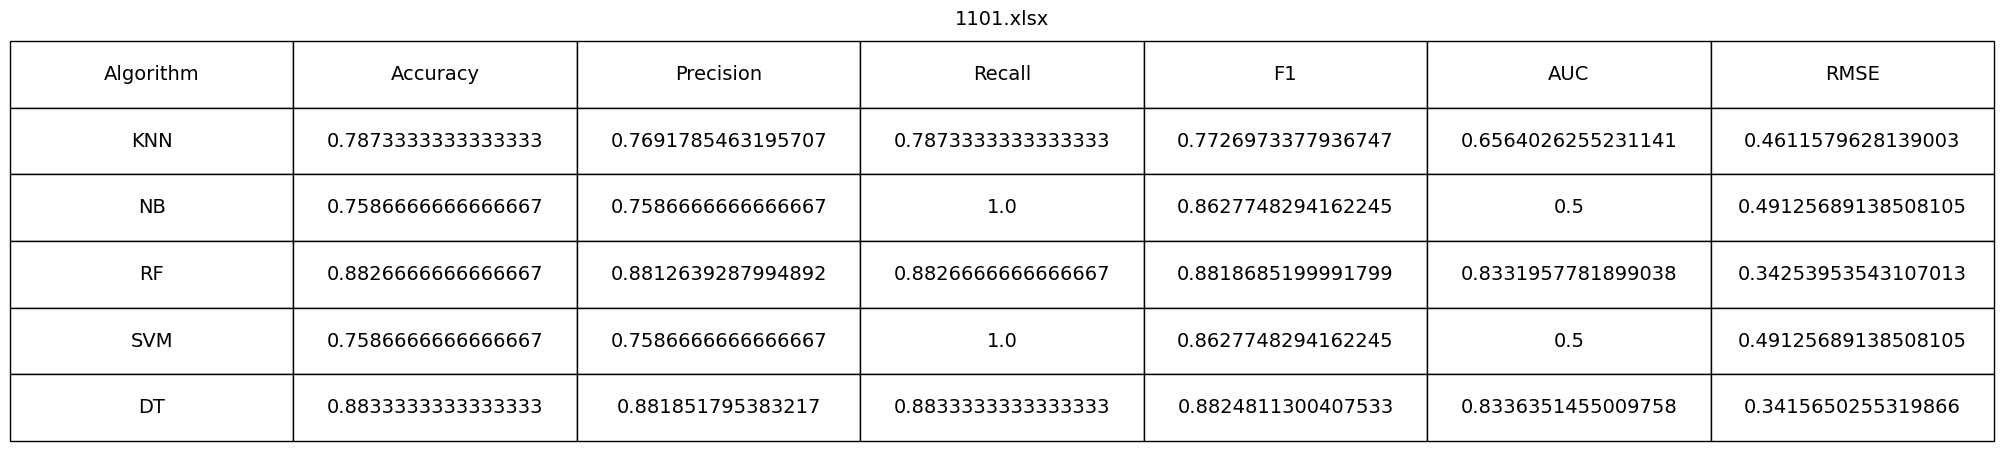

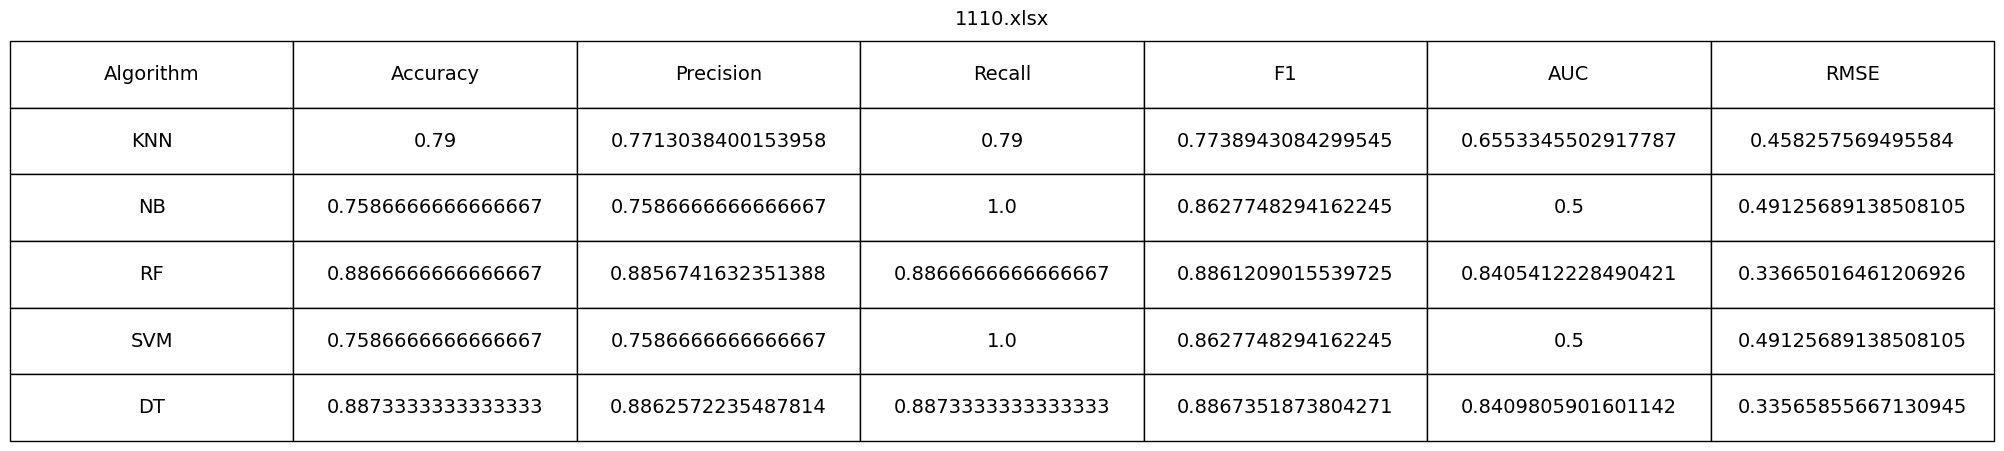

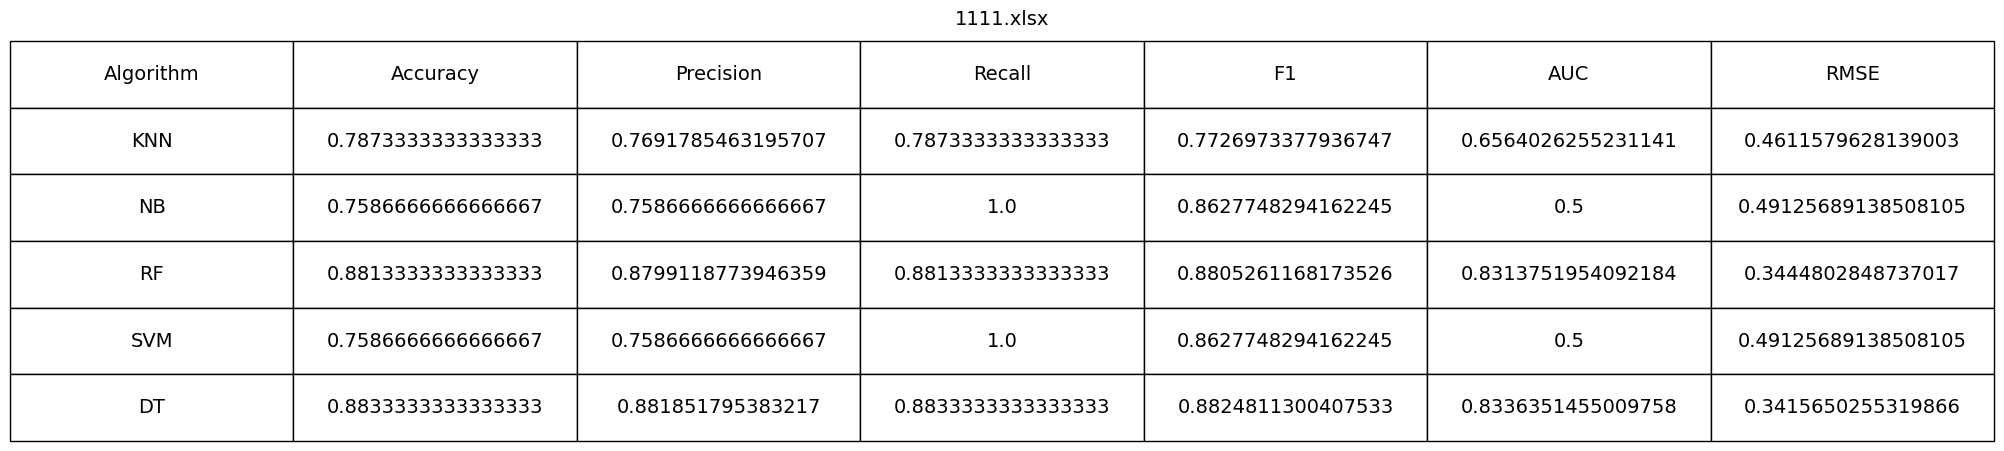

In [11]:
def plot_table(data, title):
    fig, ax = plt.subplots()

    table = ax.table(cellText=data, loc='center', cellLoc='center', colLabels=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'RMSE'])

    table.set_fontsize(14)
    table.scale(4,4)
    ax.axis('off')
    ax.set_title(title, fontsize=14, y=1.1, pad=-4)

    plt.savefig('graphs/tables/' + title + '.png')
    plt.show()


for index,name in enumerate(file_codes):
    data = [
        ['KNN', knns[index][0], knns[index][1], knns[index][2], knns[index][3], knns[index][4], knns[index][5]],
        ['NB', nbs[index][0], nbs[index][1], nbs[index][2], nbs[index][3], nbs[index][4], nbs[index][5]],
        ['RF', rfs[index][0], rfs[index][1], rfs[index][2], rfs[index][3], rfs[index][4], rfs[index][5]],
        ['SVM', svms[index][0], svms[index][1], svms[index][2], svms[index][3], svms[index][4], svms[index][5]],
        ['DT', dts[index][0], dts[index][1], dts[index][2], dts[index][3], dts[index][4], dts[index][5]]
    ]
    plot_table(data, name+'.xlsx')